<a href="https://colab.research.google.com/github/westerlingter/analyzing-environmental-dimensions-of-quality-of-life_OECD-Data-Explorer-/blob/main/Assignment_2_analys_OECD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Impor library yang diperlukan

# pandas: Digunakan untuk manipulasi dan analisis data dalam format tabel (dataframe).
# numpy: Library untuk operasi numerik tingkat lanjut seperti array dan fungsi matematika.
# train_test_split: Fungsi dari sklearn untuk membagi dataset menjadi data training dan testing.
# LabelEncoder: Digunakan untuk mengubah label kategorikal menjadi nilai numerik.
# StandardScaler: Digunakan untuk normalisasi fitur data sehingga berada dalam skala yang sama.
# seaborn: Library untuk visualisasi data berbasis statistik yang mudah digunakan.
# matplotlib.pyplot: Library dasar untuk membuat plot dan grafik visual.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

## **Load Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MSIB/Folder kita/assignment/Merge_data.csv')
df.head()

,Unnamed: 0,Reference area,TIME_PERIOD,O3_MOR,UNIT_MEASURE_x_x_x,O3_SC,UNIT_MEASURE_y_x_x,PB_MOR,UNIT_MEASURE_x_y_x,PB_SC,...,PM_SPEX35_x,UNIT_MEASURE_x_x,RN_MOR_x,UNIT_MEASURE_y_x,PM_SPEX35_y,UNIT_MEASURE_x_y,RN_MOR_y,UNIT_MEASURE_y_y,RN_SC,UNIT_MEASURE
0,0,Indonesia,1998,5.79,DT_10P6HB,0.06,PT_B1GQ,84.73,DT_10P6HB,0.85,...,NaN,NaN,2.28,DT_10P6HB,NaN,NaN,2.28,DT_10P6HB,0.02,PT_B1GQ
1,1,Indonesia,1999,4.00,DT_10P6HB,0.04,PT_B1GQ,86.36,DT_10P6HB,0.87,...,NaN,NaN,2.33,DT_10P6HB,NaN,NaN,2.33,DT_10P6HB,0.02,PT_B1GQ
2,2,Indonesia,2000,3.29,DT_10P6HB,0.03,PT_B1GQ,88.40,DT_10P6HB,0.89,...,8.48,PT_POP,2.38,DT_10P6HB,8.48,PT_POP,2.38,DT_10P6HB,0.02,PT_B1GQ
3,3,Indonesia,2001,3.07,DT_10P6HB,0.03,PT_B1GQ,90.44,DT_10P6HB,0.91,...,NaN,NaN,2.40,DT_10P6HB,NaN,NaN,2.40,DT_10P6HB,0.02,PT_B1GQ
4,4,Indonesia,2002,2.65,DT_10P6HB,0.03,PT_B1GQ,92.61,DT_10P6HB,0.93,...,NaN,NaN,2.43,DT_10P6HB,NaN,NaN,2.43,DT_10P6HB,0.02,PT_B1GQ


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          22 non-null     int64  
 1   Reference area      22 non-null     object 
 2   TIME_PERIOD         22 non-null     int64  
 3   O3_MOR              22 non-null     float64
 4   UNIT_MEASURE_x_x_x  22 non-null     object 
 5   O3_SC               22 non-null     float64
 6   UNIT_MEASURE_y_x_x  22 non-null     object 
 7   PB_MOR              22 non-null     float64
 8   UNIT_MEASURE_x_y_x  22 non-null     object 
 9   PB_SC               22 non-null     float64
 10  UNIT_MEASURE_y_y_x  22 non-null     object 
 11  PM_MOR              22 non-null     float64
 12  UNIT_MEASURE_x_x_y  22 non-null     object 
 13  PM_PWM              12 non-null     float64
 14  UNIT_MEASURE_y_x_y  12 non-null     object 
 15  PM_SC               22 non-null     float64
 16  UNIT_MEASU

In [ ]:
index = [1,2,3,5,7,9,11,13,15,17,19,21,27]
df = df.iloc[:,index]

## **C.1**

#### 1. Mencari missing value dan handling

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Reference area  22 non-null     object 
 1   TIME_PERIOD     22 non-null     int64  
 2   O3_MOR          22 non-null     float64
 3   O3_SC           22 non-null     float64
 4   PB_MOR          22 non-null     float64
 5   PB_SC           22 non-null     float64
 6   PM_MOR          22 non-null     float64
 7   PM_PWM          12 non-null     float64
 8   PM_SC           22 non-null     float64
 9   PM_SPEX10       12 non-null     float64
 10  PM_SPEX35_x     12 non-null     float64
 11  RN_MOR_x        22 non-null     float64
 12  RN_SC           22 non-null     float64
dtypes: float64(11), int64(1), object(1)
memory usage: 2.4+ KB


In [ ]:
df.head(10)

,Reference area,TIME_PERIOD,O3_MOR,O3_SC,PB_MOR,PB_SC,PM_MOR,PM_PWM,PM_SC,PM_SPEX10,PM_SPEX35_x,RN_MOR_x,RN_SC
0,Indonesia,1998,5.79,0.06,84.73,0.85,265.25,NaN,2.67,NaN,NaN,2.28,0.02
1,Indonesia,1999,4.00,0.04,86.36,0.87,270.82,NaN,2.72,NaN,NaN,2.33,0.02
2,Indonesia,2000,3.29,0.03,88.40,0.89,276.17,23.76,2.78,99.41,8.48,2.38,0.02
3,Indonesia,2001,3.07,0.03,90.44,0.91,280.73,NaN,2.82,NaN,NaN,2.40,0.02
4,Indonesia,2002,2.65,0.03,92.61,0.93,285.38,NaN,2.87,NaN,NaN,2.43,0.02
5,Indonesia,2003,3.80,0.04,94.50,1.11,289.53,NaN,3.40,NaN,NaN,2.47,0.03
6,Indonesia,2004,4.11,0.05,96.35,1.13,294.17,NaN,3.44,NaN,NaN,2.52,0.03
7,Indonesia,2005,7.70,0.09,98.02,1.14,299.49,22.11,3.49,99.54,2.77,2.58,0.03
8,Indonesia,2006,8.95,0.10,99.27,1.15,308.05,NaN,3.58,NaN,NaN,2.64,0.03
9,Indonesia,2007,9.34,0.11,100.31,1.16,320.89,NaN,3.71,NaN,NaN,2.71,0.03


In [ ]:
print("\nStatistik deskriptif:\n", df.describe())


Statistik deskriptif:
        TIME_PERIOD     O3_MOR      O3_SC      PB_MOR      PB_SC      PM_MOR  \
count    22.000000  22.000000  22.000000   22.000000  22.000000   22.000000   
mean   2008.500000   7.894545   0.088636   98.336364   1.090909  329.512727   
std       6.493587   3.545230   0.041092    6.101015   0.113930   40.788362   
min    1998.000000   2.650000   0.030000   84.730000   0.850000  265.250000   
25%    2003.250000   4.530000   0.052500   94.962500   1.110000  290.690000   
50%    2008.500000   7.850000   0.090000  101.475000   1.145000  341.905000   
75%    2013.750000  10.762500   0.125000  102.730000   1.167500  364.707500   
max    2019.000000  13.180000   0.150000  103.700000   1.170000  394.500000   

          PM_PWM      PM_SC  PM_SPEX10  PM_SPEX35_x   RN_MOR_x      RN_SC  
count  12.000000  22.000000  12.000000    12.000000  22.000000  22.000000  
mean   20.585000   3.657273  98.991667     2.021667   2.843182   0.030455  
std     1.557203   0.551605   0.5170

In [ ]:
# Missing Value
# Menggunakan forward fill
df['PM_PWM'].fillna(method='ffill', inplace=True)
df['PM_SPEX10'].fillna(method='ffill', inplace=True)
df['PM_SPEX35_x'].fillna(method='ffill', inplace=True)

# Backward fill
df['PM_PWM'].fillna(method='bfill', inplace=True)
df['PM_SPEX10'].fillna(method='bfill', inplace=True)
df['PM_SPEX35_x'].fillna(method='bfill', inplace=True)

# Menampilkan DataFrame setelah imputasi nilai yang hilang
print("\nData setelah imputasi nilai yang hilang menggunakan forward fill dan backward fill:\n", df)


Data setelah imputasi nilai yang hilang menggunakan forward fill dan backward fill:
    Reference area  TIME_PERIOD  O3_MOR  O3_SC  PB_MOR  PB_SC  PM_MOR  PM_PWM  \
0       Indonesia         1998    5.79   0.06   84.73   0.85  265.25   23.76   
1       Indonesia         1999    4.00   0.04   86.36   0.87  270.82   23.76   
2       Indonesia         2000    3.29   0.03   88.40   0.89  276.17   23.76   
3       Indonesia         2001    3.07   0.03   90.44   0.91  280.73   23.76   
4       Indonesia         2002    2.65   0.03   92.61   0.93  285.38   23.76   
5       Indonesia         2003    3.80   0.04   94.50   1.11  289.53   23.76   
6       Indonesia         2004    4.11   0.05   96.35   1.13  294.17   23.76   
7       Indonesia         2005    7.70   0.09   98.02   1.14  299.49   22.11   
8       Indonesia         2006    8.95   0.10   99.27   1.15  308.05   22.11   
9       Indonesia         2007    9.34   0.11  100.31   1.16  320.89   22.11   
10      Indonesia         2008    

<ipython-input-35-70dbd950f996>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PM_PWM'].fillna(method='ffill', inplace=True)
<ipython-input-35-70dbd950f996>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['PM_PWM'].fillna(method='ffill', inplace=True)
<ipython-input-35-70dbd950f996>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior wil

**Penjelasan kode :** Kode di atas melakukan imputasi nilai yang hilang pada kolom 'PM_PWM', 'PM_SPEX10', dan 'PM_SPEX35_x' dalam DataFrame `df`. Pertama, menggunakan metode forward fill (ffill) untuk menggantikan nilai yang hilang dengan nilai sebelumnya dalam kolom yang sama. Kemudian, metode backward fill (bfill) diterapkan untuk menggantikan nilai yang hilang dengan nilai setelahnya. Setelah proses ini, DataFrame ditampilkan dengan perubahan nilai yang hilang tersebut.

**Insight :** Setelah imputasi nilai hilang dengan metode forward dan backward fill, data pada indikator polusi udara menunjukkan perubahan signifikan pada tiga measure PM_PWM, PM_SPEX10, dan PM_SPEX35_x. Imputasi ini berhasil mengisi kekosongan data, meningkatkan keandalan analisis tren, dan memberikan gambaran yang lebih jelas.

#### 2. Mencari duplicate value dan handling

In [ ]:
# Memeriksa duplikat
duplicates = df.duplicated()

# Menghitung jumlah duplikat
duplicate_count = duplicates.sum()

# Menampilkan hasil
print(f"Jumlah duplikat: {duplicate_count}")

# Menampilkan baris yang duplikat
if duplicate_count > 0:
    print("Baris duplikat:")
    print(df[duplicates])
else:
    print("Tidak ada duplikat.")

Jumlah duplikat: 0
Tidak ada duplikat.


**Penjelasan kode :** Kode ini memeriksa dan menghitung jumlah baris duplikat dalam DataFrame pandas. Menggunakan `df.duplicated()`, kode ini menghasilkan Series boolean yang menunjukkan baris duplikat. Dengan `duplicates.sum()`, total jumlah duplikat dihitung dan ditampilkan. Jika ada duplikat, baris tersebut akan ditampilkan. jika tidak, akan ada pesan bahwa tidak ada duplikat. Kode ini berguna untuk memastikan kualitas data dengan mendeteksi entri yang mungkin terduplikasi.

**Insight :** Hasil analisis menunjukkan tidak ada duplikat dalam dataset, dengan total jumlah duplikat adalah 0. Ini memastikan bahwa setiap entri unik, menjaga integritas dan akurasi data untuk analisis selanjutnya.

In [ ]:
df.head()

,Reference area,TIME_PERIOD,O3_MOR,O3_SC,PB_MOR,PB_SC,PM_MOR,PM_PWM,PM_SC,PM_SPEX10,PM_SPEX35_x,RN_MOR_x,RN_SC
0,Indonesia,1998,5.79,0.06,84.73,0.85,265.25,23.76,2.67,99.41,8.48,2.28,0.02
1,Indonesia,1999,4.00,0.04,86.36,0.87,270.82,23.76,2.72,99.41,8.48,2.33,0.02
2,Indonesia,2000,3.29,0.03,88.40,0.89,276.17,23.76,2.78,99.41,8.48,2.38,0.02
3,Indonesia,2001,3.07,0.03,90.44,0.91,280.73,23.76,2.82,99.41,8.48,2.40,0.02
4,Indonesia,2002,2.65,0.03,92.61,0.93,285.38,23.76,2.87,99.41,8.48,2.43,0.02


#### 3. Outlier & Handling

In [ ]:
# Define the function to retrieve Q1 and Q3
def outlier_treatment(datacolumn):
    sorted_data = sorted(datacolumn)
    Q1, Q3 = np.percentile(sorted_data, [25, 75])  # Calculate Q1 and Q3
    IQR = Q3 - Q1  # Calculate IQR

    lower_range = Q1 - (1.5 * IQR)  # Calculate lower range
    upper_range = Q3 + (1.5 * IQR)  # Calculate upper range

    return lower_range, upper_range

# List of columns to analyze for outliers
columns_to_check = ['O3_MOR', 'O3_SC', 'PB_MOR', 'PB_SC', 'PM_MOR', 'PM_PWM', 'PM_SPEX10', 'PM_SC', 'PM_SPEX35_x', 'RN_MOR_x', 'RN_SC']


**Penjelasan kode :** Kode di atas mendefinisikan fungsi untuk mengidentifikasi batas nilai yang sesuai dalam dataset menggunakan metode IQR (Interquartile Range). Fungsi `outlier_treatment` menghitung kuartil pertama (Q1) dan kuartil ketiga (Q3) dari data yang diurutkan, lalu menentukan batas bawah dan atas dengan menambahkan dan mengurangi 1.5 kali IQR dari Q1 dan Q3. Selain itu, terdapat daftar kolom yang akan dianalisis untuk mendeteksi outlier, yaitu `O3_MOR`, `O3_SC`, `PB_MOR`, `PB_SC`, `PM_MOR`, `PM_PWM`, `PM_SPEX10`, `PM_SC`, `PM_SPEX35_x`, `RN_MOR_x`, dan `RN_SC`.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

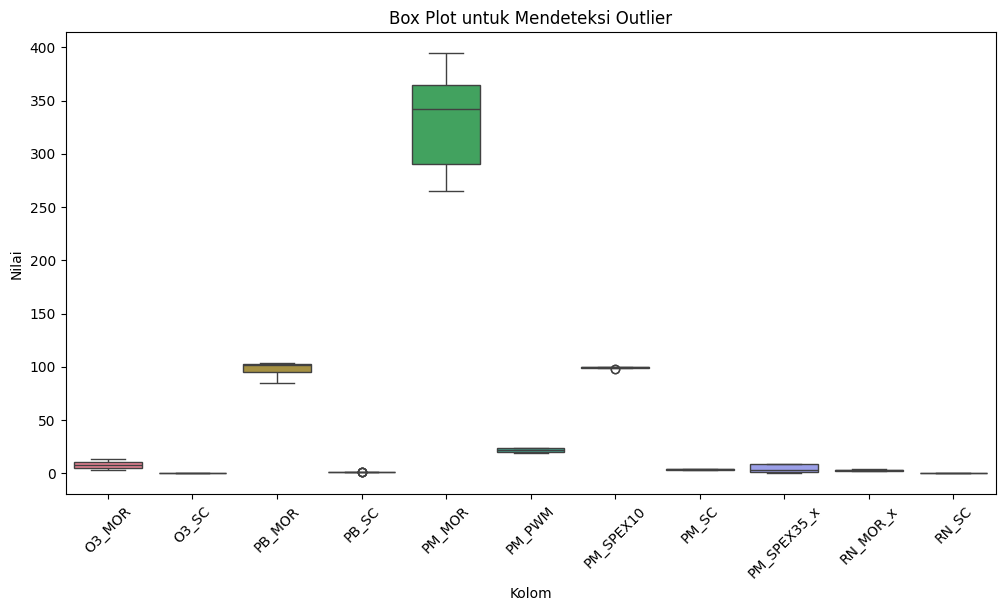

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[columns_to_check])
plt.title('Box Plot untuk Mendeteksi Outlier')
plt.xlabel('Kolom')
plt.ylabel('Nilai')
plt.xticks(rotation=45)
plt.show()

**Penjelasan kode :** Kode ini membuat box plot untuk mendeteksi outlier pada kolom yang ditentukan.
Ukuran gambar diatur 12x6 inci, dan box plot digambar dengan sns.boxplot. Judul dan label sumbu ditambahkan, dan label sumbu X diputar 45 derajat agar lebih mudah dibaca.
Akhirnya, plt.show() menampilkan box plot yang menggambarkan distribusi nilai dan outlier.

**Insight :** Dari boxplot, variabel "PM_SPEX35_x" memiliki rentang nilai terbesar,
menunjukkan variasi data yang signifikan. Selain itu, terdapat outlier pada variabel "PB_SC" dan "PM_SPEX10,"
yang menandakan adanya nilai ekstrem yang perlu diperhatikan agar tidak memengaruhi analisis.
Variabel lain cenderung stabil tanpa outlier signifikan.

In [ ]:
# Daftar kolom yang akan dianalisis
columns_to_check = ['O3_MOR', 'O3_SC', 'PB_MOR', 'PB_SC', 'PM_MOR', 'PM_PWM', 'PM_SPEX10', 'PM_SC', 'PM_SPEX35_x', 'RN_MOR_x', 'RN_SC']

# Loop melalui setiap kolom untuk menghitung outlier
for column in columns_to_check:
    lowerbound, upperbound = outlier_treatment(df[column])
    print(f"\nKolom: {column}")
    print("Lowerbound (Q1): {0}\nUpperbound (Q3): {1}".format(lowerbound, upperbound))
    print("Outlier data in dataset: {} rows.\n".format(len(df[(df[column] < lowerbound) | (df[column] > upperbound)])))



Kolom: O3_MOR
Lowerbound (Q1): -4.818749999999999
Upperbound (Q3): 20.11125
Outlier data in dataset: 0 rows.


Kolom: O3_SC
Lowerbound (Q1): -0.05624999999999998
Upperbound (Q3): 0.23374999999999999
Outlier data in dataset: 0 rows.


Kolom: PB_MOR
Lowerbound (Q1): 83.31125
Upperbound (Q3): 114.38125
Outlier data in dataset: 0 rows.


Kolom: PB_SC
Lowerbound (Q1): 1.0237500000000002
Upperbound (Q3): 1.2537499999999997
Outlier data in dataset: 5 rows.


Kolom: PM_MOR
Lowerbound (Q1): 179.66375000000002
Upperbound (Q3): 475.73375
Outlier data in dataset: 0 rows.


Kolom: PM_PWM
Lowerbound (Q1): 14.885
Upperbound (Q3): 29.085
Outlier data in dataset: 0 rows.


Kolom: PM_SPEX10
Lowerbound (Q1): 98.40875000000003
Upperbound (Q3): 100.13874999999999
Outlier data in dataset: 2 rows.


Kolom: PM_SC
Lowerbound (Q1): 2.3975000000000004
Upperbound (Q3): 5.0975
Outlier data in dataset: 0 rows.


Kolom: PM_SPEX35_x
Lowerbound (Q1): -9.301250000000001
Upperbound (Q3): 19.14875
Outlier data in datase

**Penjelasan kode :** Kode ini menganalisis outlier dari beberapa kolom dalam dataset dan
menghasilkan output dalam bentuk teks. Kolom yang dianalisis disimpan dalam variabel `columns_to_check`,
lalu batas bawah (lowerbound) dan batas atas (upperbound) dihitung dengan fungsi `outlier_treatment`.
Kode mencetak nama kolom, nilai Q1 dan Q3, serta jumlah baris outlier.
Format teks ini memudahkan mengetahui jumlah outlier di setiap kolom untuk analisis lebih lanjut.

**Insight :**  Hasil analisis outlier menunjukkan bahwa sebagian besar kolom tidak memiliki outlier,
kecuali kolom "PB_SC" dengan 5 baris outlier dan "PM_SPEX10" dengan 2 baris outlier.
Selain itu, nilai kuartil pertama (Q1) dan kuartil ketiga (Q3) dihitung untuk setiap kolom,
yang menunjukkan perlunya penanganan lebih lanjut terhadap kolom-kolom dengan outlier
untuk menjaga keakuratan analisis data.

In [ ]:
# List of columns that have outliers
columns_to_check = ['PB_SC', 'PM_SPEX10']

# Loop untuk mengganti outlier hanya pada kolom yang ditentukan
for column in columns_to_check:
    lowerbound, upperbound = outlier_treatment(df[column])
    df[column] = np.where(df[column] < lowerbound, lowerbound, df[column])  # Ganti dengan lowerbound
    df[column] = np.where(df[column] > upperbound, upperbound, df[column])  # Ganti dengan upperbound

# Menampilkan DataFrame setelah penggantian outlier
print("Data setelah mengganti outlier:")
print(df)

Data setelah mengganti outlier:
   Reference area  TIME_PERIOD  O3_MOR  O3_SC  PB_MOR    PB_SC  PM_MOR  \
0       Indonesia         1998    5.79   0.06   84.73  1.02375  265.25   
1       Indonesia         1999    4.00   0.04   86.36  1.02375  270.82   
2       Indonesia         2000    3.29   0.03   88.40  1.02375  276.17   
3       Indonesia         2001    3.07   0.03   90.44  1.02375  280.73   
4       Indonesia         2002    2.65   0.03   92.61  1.02375  285.38   
5       Indonesia         2003    3.80   0.04   94.50  1.11000  289.53   
6       Indonesia         2004    4.11   0.05   96.35  1.13000  294.17   
7       Indonesia         2005    7.70   0.09   98.02  1.14000  299.49   
8       Indonesia         2006    8.95   0.10   99.27  1.15000  308.05   
9       Indonesia         2007    9.34   0.11  100.31  1.16000  320.89   
10      Indonesia         2008    8.00   0.09  101.65  1.17000  335.71   
11      Indonesia         2009    6.07   0.07  102.34  1.17000  348.10   
12    

**Penjelasan kode :** Kode ini melakukan handling outlier pada kolom "PB_SC" dan "PM_SPEX10" dalam dataset. Pertama, kode menghitung batas bawah (lowerbound) dan batas atas (upperbound) untuk masing-masing kolom. Kemudian, nilai yang lebih kecil dari lowerbound diganti dengan lowerbound, dan nilai yang lebih besar dari upperbound diganti dengan upperbound. Akhirnya, DataFrame yang telah diperbarui ditampilkan setelah proses penggantian outlier.

**Insight :** Setelah mengganti outlier pada kolom "PB_SC" dan "PM_SPEX10," DataFrame menunjukkan bahwa nilai-nilai di kedua kolom tersebut kini berada dalam batas yang ditentukan. Penggantian ini menghilangkan 5 baris outlier pada "PB_SC" dan 2 baris pada "PM_SPEX10," menciptakan distribusi data yang lebih stabil.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


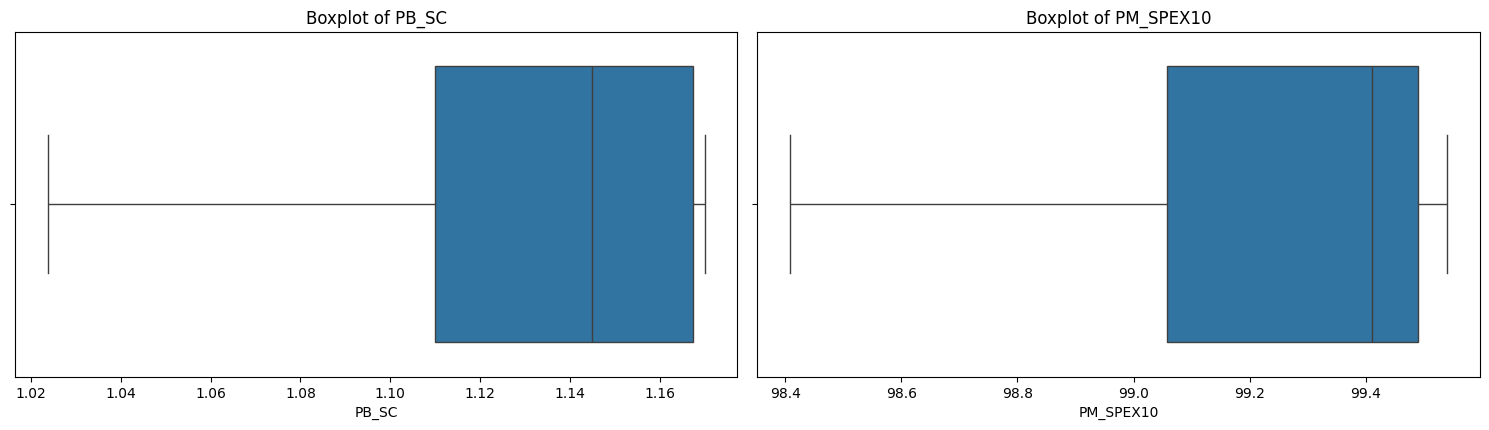

In [ ]:
plt.figure(figsize=(15, 8))
for i, column in enumerate(columns_to_check, 1):
    plt.subplot(2, 2, i)  # Menentukan posisi subplot
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

plt.tight_layout()  # Menyusun layout agar tidak tumpang tindih
plt.show()

**Penjelasan kode :** Kode ini membuat visualisasi boxplot untuk kolom dalam daftar `columns_to_check` dengan ukuran gambar 15x8 inci. Menggunakan loop, setiap boxplot digambar dalam grid 2x2 dengan `plt.subplot()`, dan `sns.boxplot()` digunakan untuk menampilkan distribusi data dan outlier. Setelah itu, `plt.tight_layout()` mengatur layout agar tidak tumpang tindih, dan `plt.show()` menampilkan semua boxplot.

**Insight :** Dari boxplot ini, variabel "PB_SC" dan "PM_SPEX10" sudah ditangani outlier-nya, sehingga kedua measure tersebut kini berada dalam batas yang normal. Hal ini menunjukkan bahwa proses pembersihan data telah berhasil, dan distribusi nilai pada kedua variabel ini dapat dianggap lebih akurat dan representatif.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

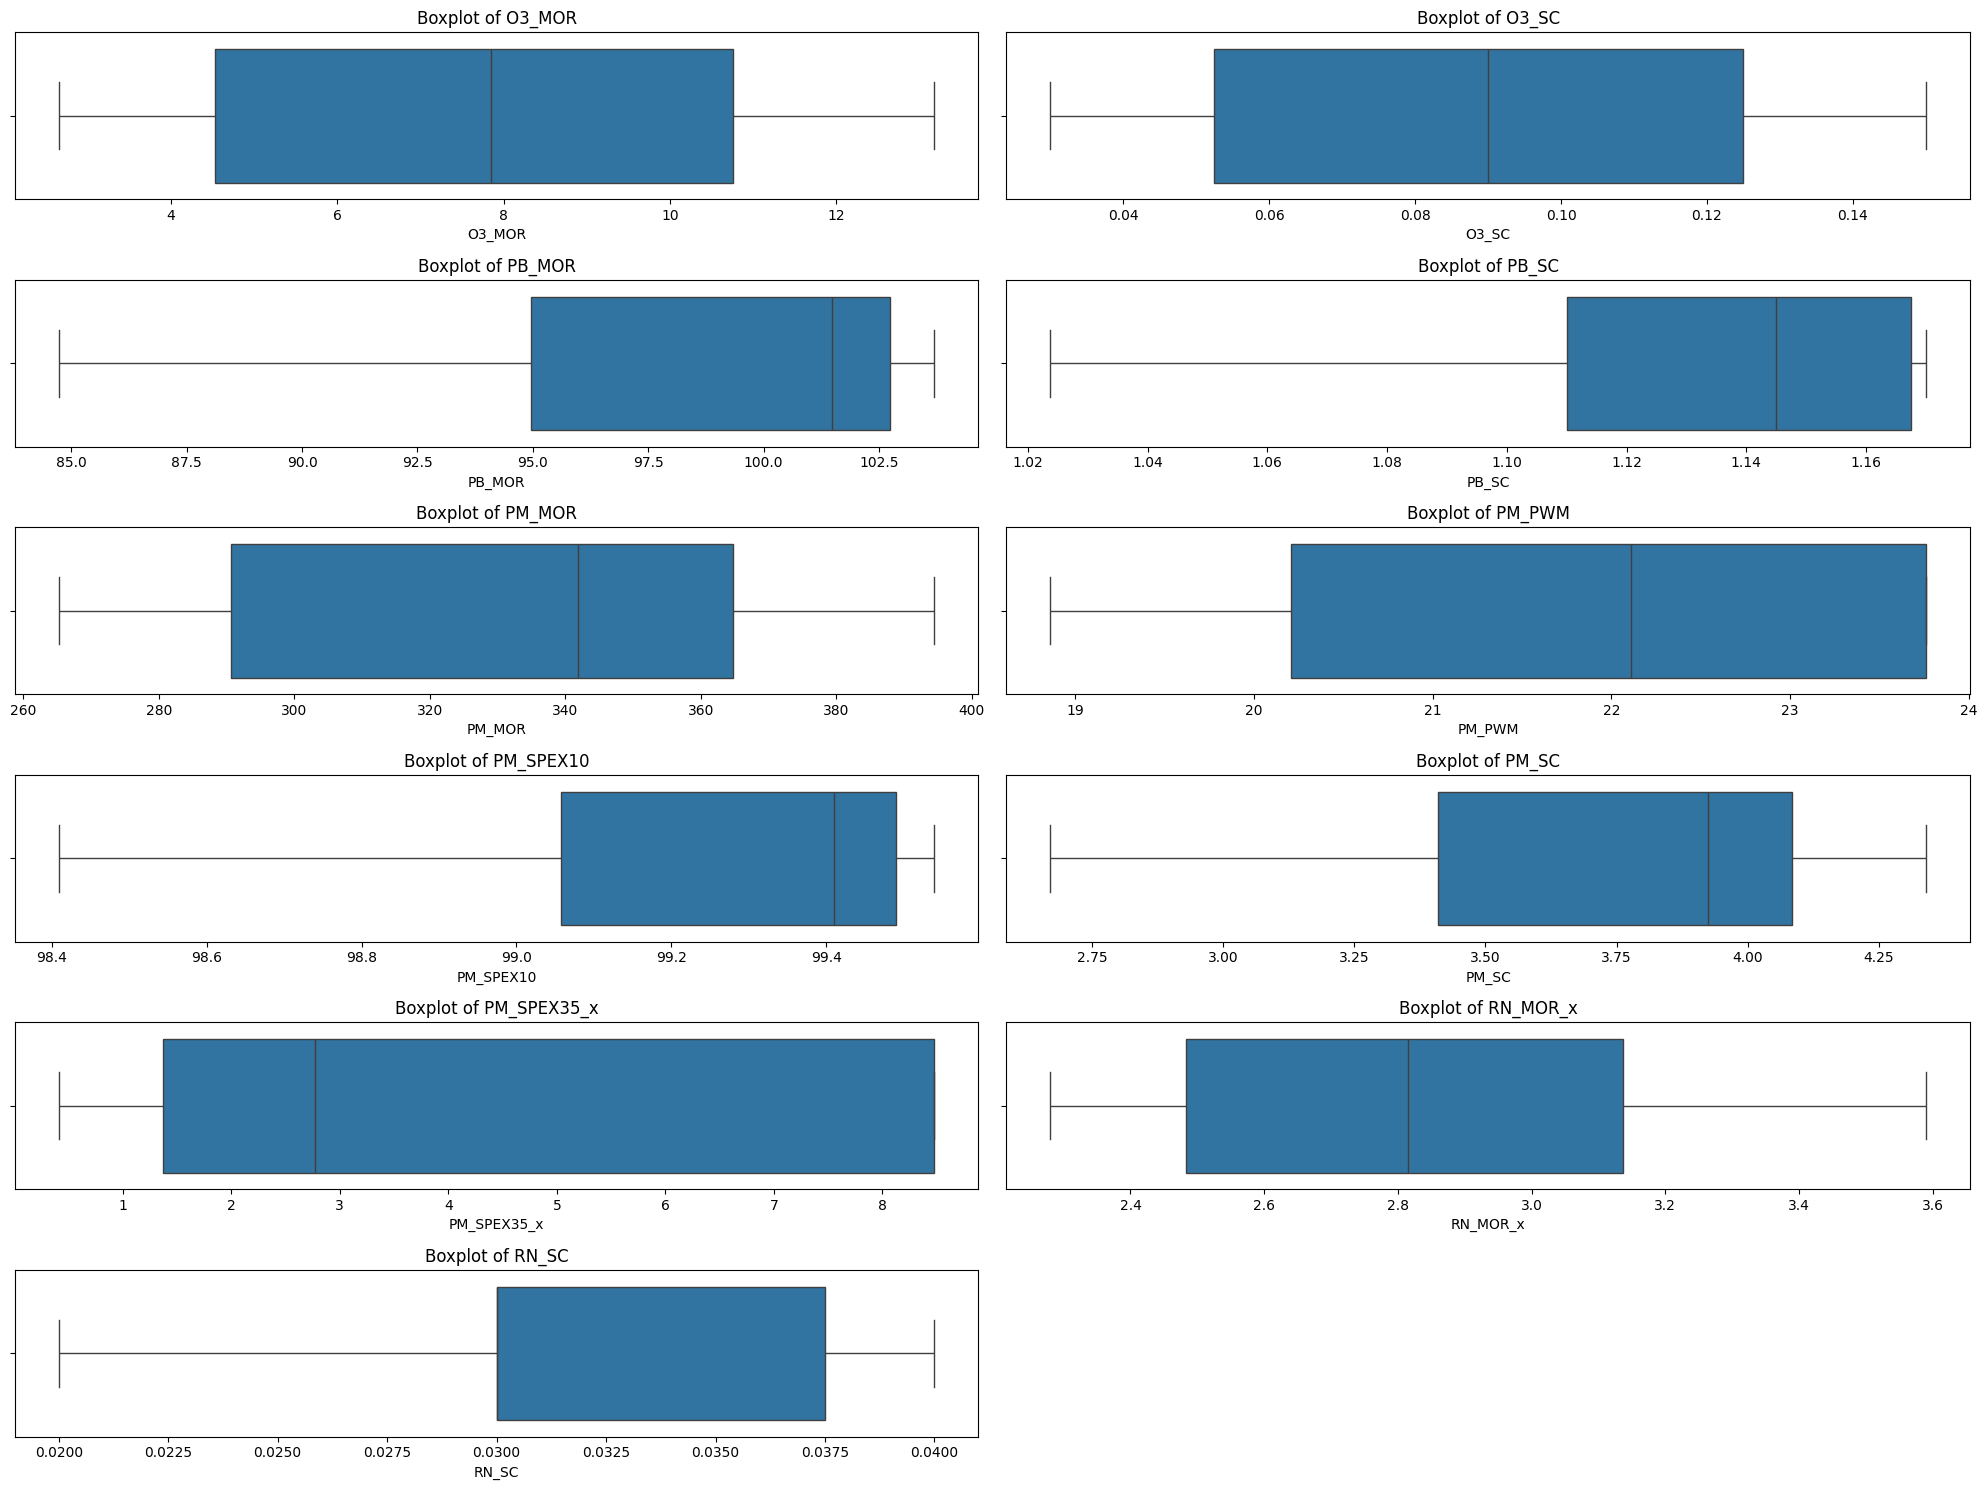

In [ ]:
columns_to_check = ['O3_MOR', 'O3_SC', 'PB_MOR', 'PB_SC', 'PM_MOR', 'PM_PWM', 'PM_SPEX10', 'PM_SC', 'PM_SPEX35_x', 'RN_MOR_x', 'RN_SC']

# Membuat boxplot untuk semua kolom
plt.figure(figsize=(20, 15))  # Ukuran figure yang lebih besar untuk memuat semua plot
num_columns = len(columns_to_check)

for i, column in enumerate(columns_to_check, 1):
    plt.subplot((num_columns + 1) // 2, 2, i)  # Menentukan posisi subplot
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

plt.tight_layout()  # Menyusun layout agar tidak tumpang tindih
plt.show()

**Penjelasan kode :** Kode ini membuat boxplot untuk semua kolom dalam daftar `columns_to_check` guna memeriksa distribusi dan memastikan tidak ada outlier yang tersisa. Ukuran gambar diatur menjadi 20x15 inci, dan setiap boxplot digambar dalam grid dua kolom. Setelah semua subplot ditambahkan, `plt.tight_layout()` mengatur layout, dan `plt.show()` menampilkan semua boxplot. Ini membantu memastikan semua measure telah diperiksa.

**Insight :** Melalui boxplot ini, terlihat jelas bahwa semua measure yang ditampilkan sudah aman dan tidak terdapat outlier lagi dalam data. Keberhasilan penanganan outlier ini memastikan distribusi data menjadi lebih representatif.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

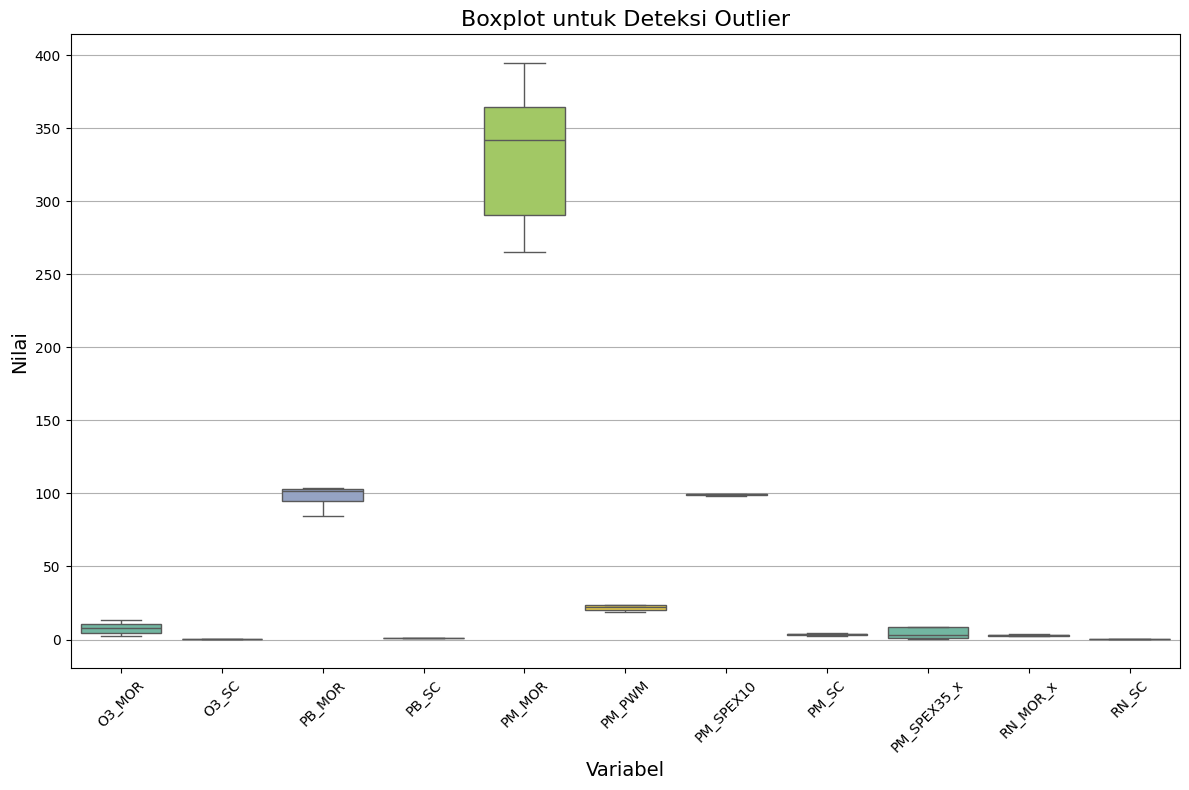

In [ ]:
# Visualisasi outlier menggunakan boxplot
plt.figure(figsize=(12, 8))  # Ukuran yang lebih besar untuk kenyamanan visual
sns.boxplot(data=df[['O3_MOR', 'O3_SC', 'PB_MOR', 'PB_SC', 'PM_MOR', 'PM_PWM', 'PM_SPEX10', 'PM_SC', 'PM_SPEX35_x', 'RN_MOR_x', 'RN_SC']], palette="Set2")
plt.title('Boxplot untuk Deteksi Outlier', fontsize=16)
plt.xlabel('Variabel', fontsize=14)
plt.ylabel('Nilai', fontsize=14)
plt.xticks(rotation=45)  # Memutar label sumbu x agar lebih mudah dibaca
plt.grid(axis='y')  # Menambahkan garis grid pada sumbu y untuk memudahkan pembacaan
plt.tight_layout()  # Mengatur layout agar tidak tumpang tindih
plt.show()


**Penjelasan kode :** Kode ini membuat boxplot untuk kolom tertentu dalam dataset untuk memvisualisasikan dan memastikan tidak ada outlier yang tersisa. Ukuran gambar adalah 12x8 inci, dengan palet warna "Set2". Label sumbu x diputar 45 derajat untuk keterbacaan, dan garis grid ditambahkan pada sumbu y. Setelah layout diatur, `plt.show()` menampilkan boxplot.

**Insight :** Dengan menggunakan boxplot yang diputar 45 derajat ini, dapat dengan jelas melihat bahwa semua measure yang ditampilkan telah aman dan tidak mengandung outlier. Penggabungan berbagai measure dalam satu boxplot menunjukkan bahwa penanganan outlier telah berhasil.

#### 4. Imbalanced Data

Pada dataset yang digunakan, imbalanced data tidak diperlukan karena pada dataset tidak terdapat kolom yang memiliki nilai categorical yang tidak seimbang.

#### 5. Encoding

Pada dataset yang digunakan, Encoding tidak perlukan karena tidak terdapat kolom categorical yang dapat diubah kedalam numerical. Pada dataset references area hanya satu sehingga tidak diperlukan encoding.

## **C.2**

### Elaborasi feature

In [ ]:
# Fungsi untuk mengelaborasi fitur dan tipe data pada dataframe
def elaborate_features(df):

    print("Elaborasi Fitur dan Tipe Data:")

    # Melakukan loop pada setiap kolom di dataframe
    for column in df.columns:
        # Mendapatkan tipe data dari kolom saat ini
        dtype = df[column].dtype
        print(f"\n{column}:")  # Menampilkan nama kolom
        print(f"  Tipe data: {dtype}")  # Menampilkan tipe data kolom

        # Mengecek apakah kolom merupakan data numerik
        if pd.api.types.is_numeric_dtype(dtype):
            print("  Kategori: Numerical")  # Mengkategorikan sebagai numerik
            # Menampilkan rentang nilai pada kolom (nilai minimum dan maksimum)
            print(f"  Range: {df[column].min()} to {df[column].max()}")

        # Mengecek apakah kolom berisi data temporal, khususnya 'TIME_PERIOD'
        elif column == 'TIME_PERIOD':
            print("  Kategori: Temporal (Year)")  # Mengkategorikan sebagai data temporal
            # Menampilkan rentang tahun
            print(f"  Range: {df[column].min()} to {df[column].max()}")

        # Mengecek apakah kolom berisi data kategorikal, khususnya 'Reference area'
        elif column == 'Reference area':
            print("  Kategori: Categorical (Nominal)")  # Mengkategorikan sebagai data kategorikal (nominal)
            # Menampilkan jumlah nilai unik (misalnya, jumlah area referensi yang berbeda)
            print(f"  Nilai unik: {df[column].nunique()}")

        # Untuk tipe data kategorikal lainnya
        else:
            print("  Kategori: Categorical")  # Mengkategorikan sebagai kategorikal
            # Menampilkan jumlah nilai unik dalam kolom
            print(f"  Nilai unik: {df[column].nunique()}")

# Menjalankan fungsi untuk menganalisis fitur pada dataframe
elaborate_features(df)


Elaborasi Fitur dan Tipe Data:

Reference area:
  Tipe data: object
  Kategori: Categorical (Nominal)
  Nilai unik: 1

TIME_PERIOD:
  Tipe data: int64
  Kategori: Numerical
  Range: 1998 to 2019

O3_MOR:
  Tipe data: float64
  Kategori: Numerical
  Range: 2.65 to 13.18

O3_SC:
  Tipe data: float64
  Kategori: Numerical
  Range: 0.03 to 0.15

PB_MOR:
  Tipe data: float64
  Kategori: Numerical
  Range: 84.73 to 103.7

PB_SC:
  Tipe data: float64
  Kategori: Numerical
  Range: 1.0237500000000002 to 1.17

PM_MOR:
  Tipe data: float64
  Kategori: Numerical
  Range: 265.25 to 394.5

PM_PWM:
  Tipe data: float64
  Kategori: Numerical
  Range: 19.647500000000008 to 21.147499999999994

PM_SC:
  Tipe data: float64
  Kategori: Numerical
  Range: 2.67 to 4.34

PM_SPEX10:
  Tipe data: float64
  Kategori: Numerical
  Range: 98.78041666666667 to 99.34375

PM_SPEX35_x:
  Tipe data: float64
  Kategori: Numerical
  Range: 0.41 to 3.002916666666667

RN_MOR_x:
  Tipe data: float64
  Kategori: Numerical
  

**Penjelasan kode:** Kode di atas melakukan elaborasi fitur dan tipe data pada DataFrame df. Fungsi elaborate_features(df) akan melakukan iterasi pada setiap kolom dalam DataFrame dan menampilkan nama kolom, tipe data, serta informasi tambahan mengenai kategori dan rentang nilai dari setiap kolom. Untuk kolom numerik, kode ini juga menampilkan rentang nilai minimum dan maksimum. Jika kolom tersebut berisi data kategorikal, kode ini menampilkan jumlah nilai unik

**Insight:**  Setelah proses elaborasi fitur dan tipe data, kita memperoleh informasi penting terkait struktur data yang terdapat dalam DataFrame. Dari sini, kita bisa melihat adanya berbagai tipe data, seperti numerik, interval, dan kategorikal. Mengetahui hal ini membantu kita dalam mempersiapkan data lebih lanjut untuk analisis atau model machine learning. Sebagai contoh, kolom numerik memberikan informasi mengenai rentang nilai yang dapat digunakan untuk mengecek keberadaan outlier, sementara kolom kategorikal seperti 'Reference area' membantu memahami distribusi data berdasarkan wilayah. Proses ini membantu kita dalam menyusun langkah-langkah pre-processing yang tepat, seperti normalisasi, encoding, atau penanganan outlier yang lebih efisien.

##### **- Reference Area :**  **Tipe Data (Nominal)**
feature ini tergolong data kategorikal yang tidak memiliki urutan atau rangking. pilihan dalam data ini, misalnya : INDONESIA, MALAYSIA, SINGAPURA, tidak memiliki nilai numerik yang dapat  diurutkan atau diberi bobot yang mempengaruhi data satu lebih tinggi nilainya dari data yang lain. karena itu, ini adalah contoh data Nominal.

##### **- Time_Periode :**  **Tipe Data (Interval)**
feature ini memiliki value dengan tipe data integer, dan tergolong dalam data Numerical, namun feature ini tidak memiliki nilai NOL yang absolut data ini juga memiliki jarak yang sama antar valuenya yang oleh karena itu ini termasuk dalam data Interval, yang dapat digunakan sebagai acuan untuk melihat pergerakan nilai dari suatu objek analisis.

##### **- O3_MOE :**  **Tipe Data (Rasio)**
nilai pada feature ini mengacu pada jumlah kematian yang diakibatkan oleh ozon yang berada pada lapisan troposfer, yang dihitung dengan satuan pengukuran  per 1 juta penduduk, yang berarti jika nilai pada feature ini adalah 10, maka disetiap satu juta orang diwilayah tersebut, rata - rata 10 orang meninggal akibat paparan ozon. dikarenakan data ini merupakan hasil perhitungan statistik rata - rata maka terdapat beberapa nilai yang desimal yang dapat kita simpulkan jika nila adalah 5.7 berarti kematian sekitar 5 sampai 6 orang. feature ini memiliki tipe data Float dan tergolong dalam tipe rasio, karena memiliki nila NOL yang absolu

##### **- O3_SC :** **Tipe Data (Rasio)**
nilai pada feature ini mengacu pada kerugian suatu daerah yang disebabkan oleh kematian yang diakibatkan oleh ozon yang berada pada lapisan troposfer, kematian ini berdampak pada berkurangnya produktivitas manusia, beban biaya kesehatan dan dampak negatif lain terhadap masyarakat. dalam feature ini nilai kerugian direpresentasikan dalam presentase dari total PDB negara tersebut. yang berarti jika nilainya dalah 0.01 / 1 % maka keriguan yang diakibatkan dari kasus ini setara dengan 1% total PDB negara tersebut dalam satu tahun.

##### **- PB_SC :** **Tipe Data (Rasio)**
Nilai pada feature ini merujuk pada kerugian ekonomi yang diakibatkan oleh paparan timbal (lead) di lingkungan. Kerugian ini mencakup dampak pada kesehatan manusia, penurunan produktivitas, serta biaya kesehatan terkait. Nilai diukur dalam persentase dari total PDB negara tersebut. Jika nilainya adalah 0.01 atau 1%, ini berarti kerugian dari paparan timbal setara dengan 1% dari PDB negara tersebut dalam satu tahun.

##### **- PM_MOR :** **Tipe Data (Rasio)**
Nilai pada feature ini merujuk pada jumlah kematian akibat paparan Particulate Matter (PM), seperti PM2.5, dalam satuan per 1 juta penduduk. Misalnya, jika nilainya 5.7, ini berarti sekitar 5 hingga 6 orang meninggal per 1 juta penduduk akibat paparan polusi PM. Angka ini adalah hasil estimasi statistik yang bisa berupa desimal.

##### **- PM_PWM :** **Tipe Data (Rasio)**
Nilai pada feature ini mengacu pada konsentrasi Particulate Matter (PM), khususnya PM2.5, yang diukur dalam cubic meters (m³) per satuan volume udara. Ini menunjukkan seberapa banyak polusi PM terdeteksi dalam udara yang dihirup oleh populasi di suatu wilayah. Nilai yang lebih tinggi menandakan paparan polusi udara yang lebih besar.

##### **- PM_SC :** **Tipe Data (Rasio)**
Feature ini mengacu pada kerugian ekonomi yang disebabkan oleh dampak kesehatan dari paparan Particulate Matter (PM), seperti penurunan produktivitas, biaya kesehatan, dan dampak sosial lainnya. Nilai ini direpresentasikan dalam persentase dari total PDB negara. Misalnya, jika nilainya 0.02 atau 2%, ini menunjukkan bahwa kerugian yang diakibatkan oleh paparan PM setara dengan 2% dari PDB negara dalam satu tahun.

##### **- PM_SPEX35 :** **Tipe Data (Rasio)**
Nilai pada feature ini menunjukkan persentase populasi yang terpapar Particulate Matter (PM) lebih dari 35 micrograms per cubic meter (µg/m³). Jika nilainya adalah 20%, ini berarti 20% dari total populasi di suatu wilayah terpapar PM pada level yang lebih tinggi dari 35 µg/m³, yang merupakan batas ambang yang dianggap berbahaya bagi kesehatan.

##### **- RN_MOR_X :** **Tipe Data (Rasio)**
Nilai pada feature ini merujuk pada jumlah kematian yang diakibatkan oleh paparan radon (RN) dalam satuan per 1 juta penduduk. Misalnya, jika nilai feature ini adalah 3.4, artinya rata-rata 3 hingga 4 orang meninggal setiap tahunnya per 1 juta penduduk karena paparan radon. Seperti feature lainnya, data ini bisa berupa desimal karena merupakan hasil estimasi statistik.

##### **- RN_SC :** **Tipe Data (Rasio)**
Feature ini mengacu pada kerugian ekonomi yang diakibatkan oleh kematian akibat paparan radon (RN), yang berdampak pada produktivitas manusia dan biaya kesehatan. Nilai diukur dalam persentase dari PDB negara. Jika nilainya adalah 0.03 atau 3%, ini berarti kerugian dari paparan radon setara dengan 3% dari PDB negara dalam satu tahun.


### Deskripsi Mean, Median, Modus

In [ ]:
# Fungsi untuk menganalisis tendensi sentral (mean, median, dan modus) dari kolom numerik pada dataframe
def analyze_central_tendency(df):
    # Memilih kolom-kolom yang memiliki tipe data numerik
    numeric_columns = df.select_dtypes(include=[np.number]).columns

    # Melakukan loop pada setiap kolom numerik
    for column in numeric_columns:
        # Menghitung rata-rata (mean) dari kolom
        mean = df[column].mean()
        # Menghitung nilai tengah (median) dari kolom
        median = df[column].median()
        # Menghitung nilai yang paling sering muncul (modus) dari kolom
        mode = df[column].mode().values[0]

        # Menampilkan hasil analisis tendensi sentral untuk kolom saat ini
        print(f"\nAnalisis Central Tendency untuk {column}:")
        print(f"Mean: {mean:.4f}")   # Menampilkan rata-rata dengan 4 desimal
        print(f"Median: {median:.4f}")  # Menampilkan median dengan 4 desimal
        print(f"Modus: {mode:.4f}")    # Menampilkan modus dengan 4 desimal

        # Mengecek apakah distribusi simetris berdasarkan perbedaan antara mean dan median
        if abs(mean - median) > 0.1 * abs(mean):
            print("Distribusi mungkin tidak simetris karena terdapat perbedaan signifikan antara mean dan median.")
        else:
            print("Distribusi cenderung simetris karena mean dan median relatif dekat.")

        # Mengkategorikan jenis distribusi berdasarkan hubungan antara mean, median, dan modus
        if mode == median == mean:
            print("Distribusi kemungkinan besar normal karena mean, median, dan modus sama.")
        elif mode > median > mean:
            print("Distribusi kemungkinan right-skewed (condong ke kanan).")
        elif mode < median < mean:
            print("Distribusi kemungkinan left-skewed (condong ke kiri).")

# Menjalankan fungsi untuk menganalisis tendensi sentral pada dataframe
analyze_central_tendency(df)



Analisis Central Tendency untuk TIME_PERIOD:
Mean: 2008.5000
Median: 2008.5000
Modus: 1998.0000
Distribusi cenderung simetris karena mean dan median relatif dekat.

Analisis Central Tendency untuk O3_MOR:
Mean: 7.8945
Median: 7.8500
Modus: 2.6500
Distribusi cenderung simetris karena mean dan median relatif dekat.
Distribusi kemungkinan left-skewed (condong ke kiri).

Analisis Central Tendency untuk O3_SC:
Mean: 0.0886
Median: 0.0900
Modus: 0.0300
Distribusi cenderung simetris karena mean dan median relatif dekat.

Analisis Central Tendency untuk PB_MOR:
Mean: 98.3364
Median: 101.4750
Modus: 84.7300
Distribusi cenderung simetris karena mean dan median relatif dekat.

Analisis Central Tendency untuk PB_SC:
Mean: 1.1213
Median: 1.1450
Modus: 1.1700
Distribusi cenderung simetris karena mean dan median relatif dekat.
Distribusi kemungkinan right-skewed (condong ke kanan).

Analisis Central Tendency untuk PM_MOR:
Mean: 329.5127
Median: 341.9050
Modus: 265.2500
Distribusi cenderung simetris 

**Penjelasan kode :** kode berikut bertujuan untuk melakukan analisa tendensi sentral seperti (mean, median dan modus) pada kolom numerik yang ada dalam DataFrame df. pertama, kode ini memilih kolom yang bertipe data numerik menggunakan select_dtypes(). selanjutnya, pada setiap kolom numerik, dilakukan perhitungan mean, median, dan modus. setelah perhitungan selesai kode ini melakukan cek terhadap distribusi data simetris, ini dilakukan dengan membandingkan antara mean dan median.

**Insight :**  Setelah melakukan analisis tendensi sentral, distribusi pada kolom-kolom numerik dapat digolongkan berdasarkan pola hubungan antara mean, median, dan modus. Kolom dengan nilai mean, median, dan modus yang mendekati sama kemungkinan besar memiliki distribusi normal. Sebaliknya, jika terdapat perbedaan yang signifikan, distribusi data mungkin skewed, baik ke kanan (right-skewed) jika modus lebih besar dari mean, maupun ke kiri (left-skewed) jika modus lebih kecil dari mean. Insight ini penting untuk memahami bentuk distribusi data dan selanjutnya membantu dalam menentukan pendekatan analisis lebih lanjut, seperti perlakuan terhadap skewness atau outlier.

**- Mean :**


*   Distribusi Normal :
>saat data berdistirbusi normal mean dapat digunakan untuk mengisi missing value
*   Tidak ada Outlier :
> jika tidak terdapat outlier yang signifikan terhadapa data, nilai ini dapat digunakan untuk mengisi missing value karena dapat merepresentasikan rata - rata dari seluruh data.

**- Median :**


*   Distribusi skewed :
>saat data berdistribusi condong median dapat digunakan untuk mengisi missing value, karena nilai ini menunjukan nilai tengah dari data walau data tidak normal.

*   Terdapat Outlier :
> saat terdapat outlier pada data nilai ini dapat digunakan untuk mengisi missing value dan melihat nilai tengah dari data karena median tidak terpengaruh outlier.

**- Modus :**
*   :
> nilai ini dapat digunakan untuk mengisi missing value terhadap data dengan tipe kategorical, karena data tersebut tidak memiliki mean dan median, terutama jika pada data tersebut memiliki class (terdapat suatu nilai yang sering muncul). maka modus dapat digunakan untuk mendapatkan nilai yang paling sering muncul untuk digunakan dalam pengisian data.





### Deskripsi Statistical five summaries

In [ ]:
def five_number_summary(df):
    # Mendapatkan kolom-kolom yang bertipe numerik dalam dataset
    numeric_columns = df.select_dtypes(include=[np.number]).columns

    # Melakukan perulangan untuk setiap kolom numerik
    for column in numeric_columns:
        # Menghitung rangkuman statistik deskriptif (termasuk mean, median, kuartil, dll.)
        summary = df[column].describe()

        # Mencetak ringkasan lima angka (five-number summary) untuk kolom saat ini
        print(f"\nFive-Number Summary untuk {column}:")
        print(f"Minimum: {summary['min']:.4f}")  # Nilai minimum
        print(f"Q1 (25%): {summary['25%']:.4f}")  # Kuartil pertama (25%)
        print(f"Median (50%): {summary['50%']:.4f}")  # Median (50%)
        print(f"Q3 (75%): {summary['75%']:.4f}")  # Kuartil ketiga (75%)
        print(f"Maximum: {summary['max']:.4f}")  # Nilai maksimum

        # Menghitung IQR (Interquartile Range), yaitu selisih antara Q3 dan Q1
        iqr = summary['75%'] - summary['25%']

        # Menghitung batas bawah untuk deteksi outlier (data yang jauh dari nilai umum)
        lower_bound = summary['25%'] - 1.5 * iqr

        # Menghitung batas atas untuk deteksi outlier
        upper_bound = summary['75%'] + 1.5 * iqr

        # Mencetak nilai IQR dan batas bawah serta atas untuk outlier
        print(f"IQR: {iqr:.4f}")
        print(f"Lower bound for outliers: {lower_bound:.4f}")
        print(f"Upper bound for outliers: {upper_bound:.4f}")

# Jalankan fungsi
five_number_summary(df)



Five-Number Summary untuk TIME_PERIOD:
Minimum: 1998.0000
Q1 (25%): 2003.2500
Median (50%): 2008.5000
Q3 (75%): 2013.7500
Maximum: 2019.0000
IQR: 10.5000
Lower bound for outliers: 1987.5000
Upper bound for outliers: 2029.5000

Five-Number Summary untuk O3_MOR:
Minimum: 2.6500
Q1 (25%): 4.5300
Median (50%): 7.8500
Q3 (75%): 10.7625
Maximum: 13.1800
IQR: 6.2325
Lower bound for outliers: -4.8187
Upper bound for outliers: 20.1112

Five-Number Summary untuk O3_SC:
Minimum: 0.0300
Q1 (25%): 0.0525
Median (50%): 0.0900
Q3 (75%): 0.1250
Maximum: 0.1500
IQR: 0.0725
Lower bound for outliers: -0.0562
Upper bound for outliers: 0.2337

Five-Number Summary untuk PB_MOR:
Minimum: 84.7300
Q1 (25%): 94.9625
Median (50%): 101.4750
Q3 (75%): 102.7300
Maximum: 103.7000
IQR: 7.7675
Lower bound for outliers: 83.3113
Upper bound for outliers: 114.3812

Five-Number Summary untuk PB_SC:
Minimum: 1.0238
Q1 (25%): 1.1100
Median (50%): 1.1450
Q3 (75%): 1.1675
Maximum: 1.1700
IQR: 0.0575
Lower bound for outliers:

**Penjelasan kode :**Kode di atas digunakan untuk menghitung five-number summary dari kolom-kolom numerik dalam DataFrame df. Fungsi ini mengambil semua kolom dengan tipe data numerik dan kemudian menghitung statistik deskriptif untuk masing-masing kolom, seperti nilai minimum, kuartil pertama (Q1), median (Q2), kuartil ketiga (Q3), dan nilai maksimum. Selain itu, kode ini juga menghitung interquartile range (IQR), yang merupakan selisih antara Q3 dan Q1. IQR digunakan untuk mendeteksi outliers dengan menghitung whisker atau batas bawah dan batas atas, yaitu Q1 - 1.5 * IQR dan Q3 + 1.5 * IQR.

**Insight :**  Setelah melakukan perhitungan five-number summary, kita bisa lebih memahami distribusi data dalam setiap kolom numerik. Nilai minimum, kuartil, dan maksimum membantu memberikan gambaran tentang sebaran data secara umum, sedangkan perhitungan IQR dan batas outlier memberikan alat untuk mendeteksi anomali dalam data. Outlier yang berada di luar batas yang dihitung dengan IQR dapat diidentifikasi untuk analisis lebih lanjut atau dipertimbangkan untuk dihilangkan jika dianggap mengganggu analisis. Insight ini dapat membantu mengoptimalkan model dan menghasilkan analisis data yang lebih akurat.

In [ ]:
df.describe()

,TIME_PERIOD,O3_MOR,O3_SC,PB_MOR,PB_SC,PM_MOR,PM_PWM,PM_SC,PM_SPEX10,PM_SPEX35_x,RN_MOR_x,RN_SC
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,2008.500000,7.894545,0.088636,98.336364,1.121307,329.512727,20.433182,3.657273,99.037140,1.745568,2.843182,0.030455
std,6.493587,3.545230,0.041092,6.101015,0.057314,40.788362,0.507650,0.551605,0.195209,0.742075,0.403076,0.007222
min,1998.000000,2.650000,0.030000,84.730000,1.023750,265.250000,19.647500,2.670000,98.780417,0.410000,2.280000,0.020000
25%,2003.250000,4.530000,0.052500,94.962500,1.110000,290.690000,20.210000,3.410000,98.991667,1.367500,2.482500,0.030000
50%,2008.500000,7.850000,0.090000,101.475000,1.145000,341.905000,20.585000,3.925000,98.991667,2.021667,2.815000,0.030000
75%,2013.750000,10.762500,0.125000,102.730000,1.167500,364.707500,20.585000,4.085000,99.132500,2.021667,3.137500,0.037500
max,2019.000000,13.180000,0.150000,103.700000,1.170000,394.500000,21.147500,4.340000,99.343750,3.002917,3.590000,0.040000


### data distribution

<ipython-input-49-8accb2870dfc>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature_name], color=color, shade=True, label=f'Density of {feature_name}')


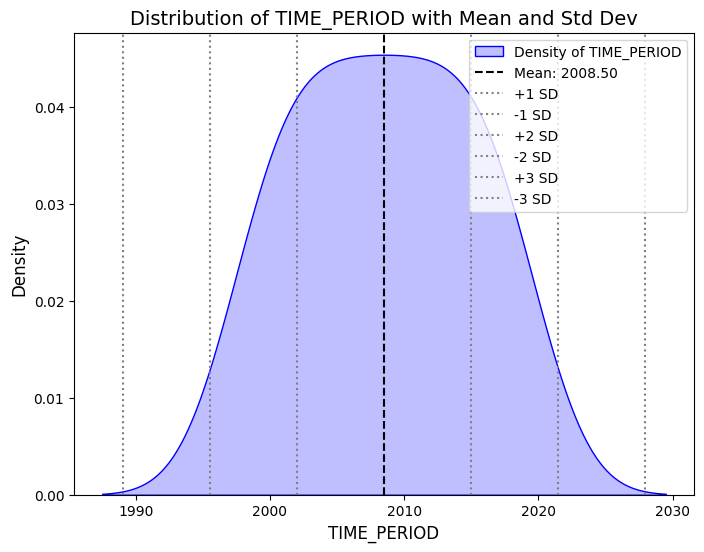

<ipython-input-49-8accb2870dfc>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature_name], color=color, shade=True, label=f'Density of {feature_name}')


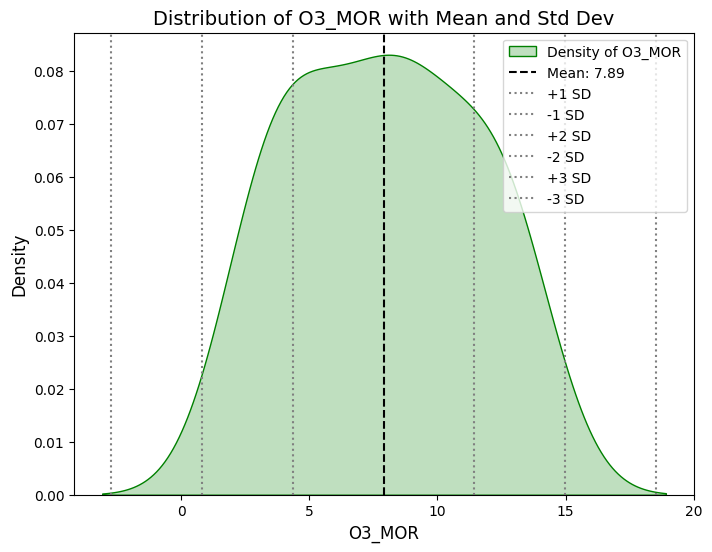

<ipython-input-49-8accb2870dfc>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature_name], color=color, shade=True, label=f'Density of {feature_name}')


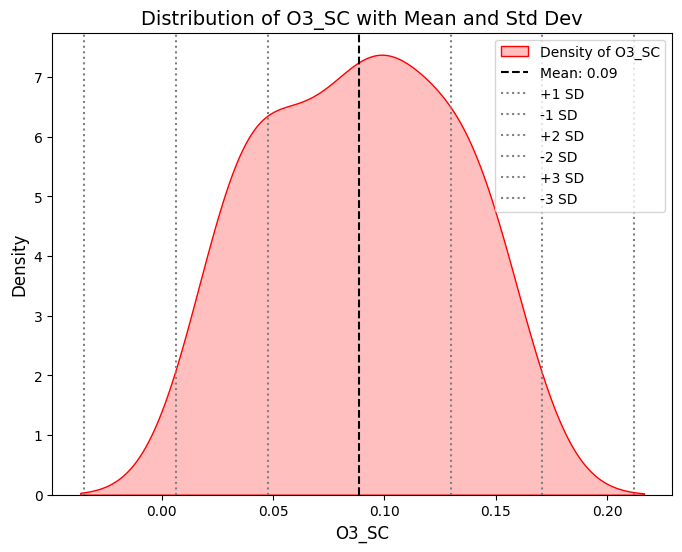

<ipython-input-49-8accb2870dfc>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature_name], color=color, shade=True, label=f'Density of {feature_name}')


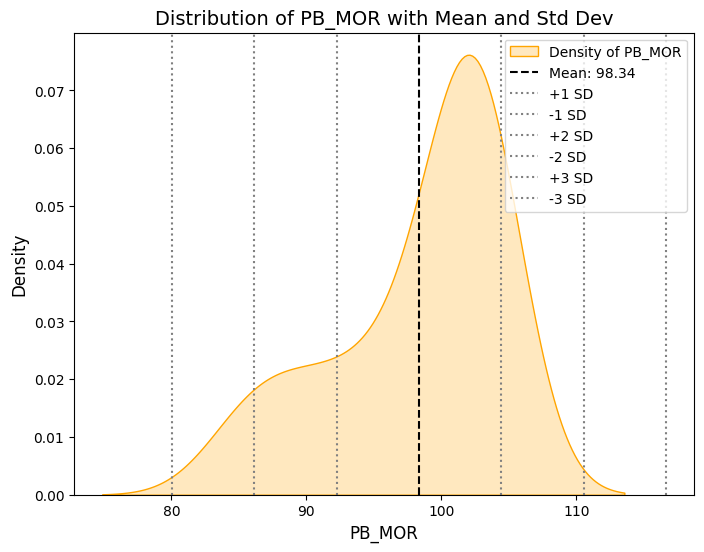

<ipython-input-49-8accb2870dfc>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature_name], color=color, shade=True, label=f'Density of {feature_name}')


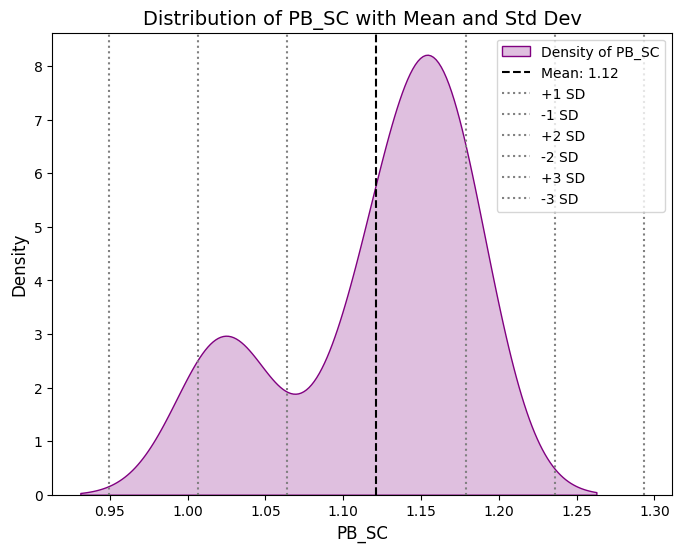

<ipython-input-49-8accb2870dfc>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature_name], color=color, shade=True, label=f'Density of {feature_name}')


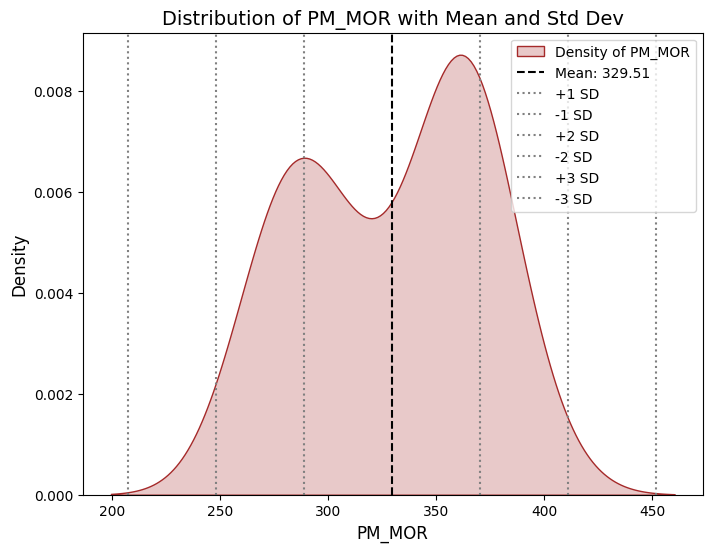

<ipython-input-49-8accb2870dfc>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature_name], color=color, shade=True, label=f'Density of {feature_name}')


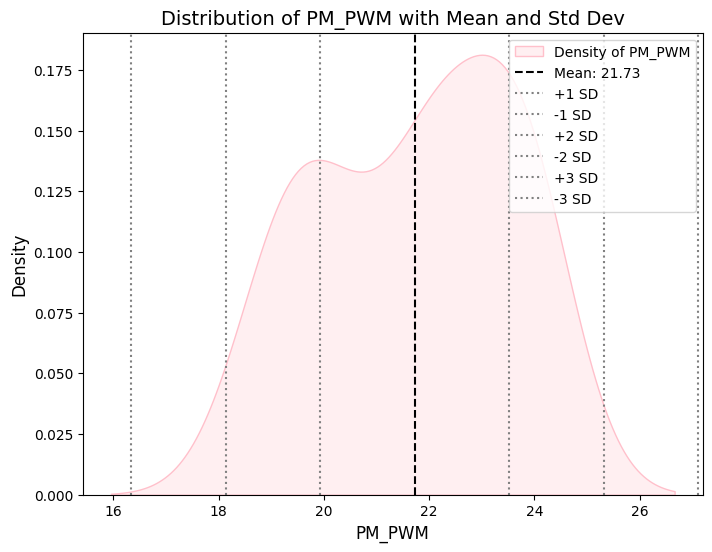

<ipython-input-49-8accb2870dfc>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature_name], color=color, shade=True, label=f'Density of {feature_name}')


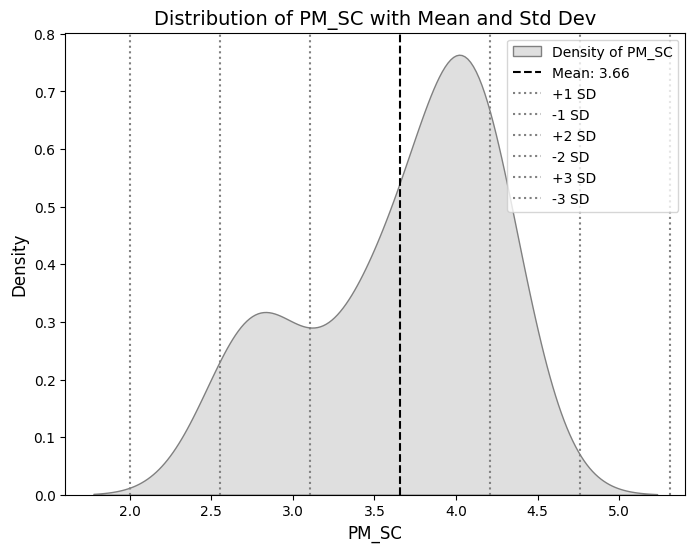

<ipython-input-49-8accb2870dfc>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature_name], color=color, shade=True, label=f'Density of {feature_name}')


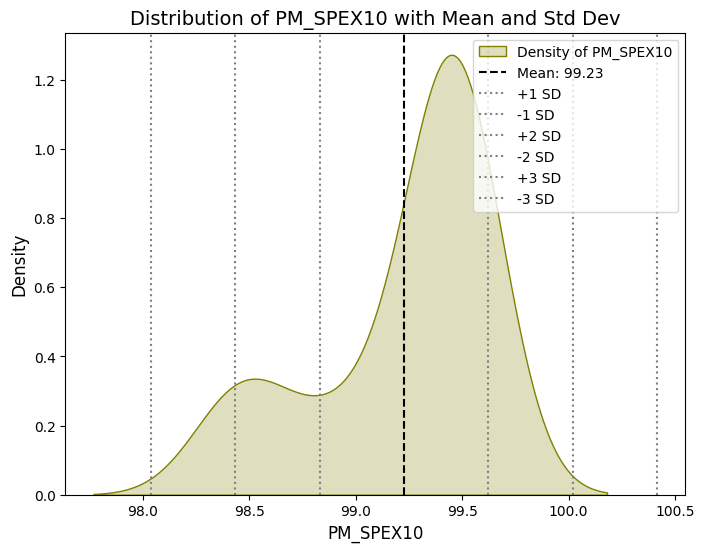

<ipython-input-49-8accb2870dfc>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature_name], color=color, shade=True, label=f'Density of {feature_name}')


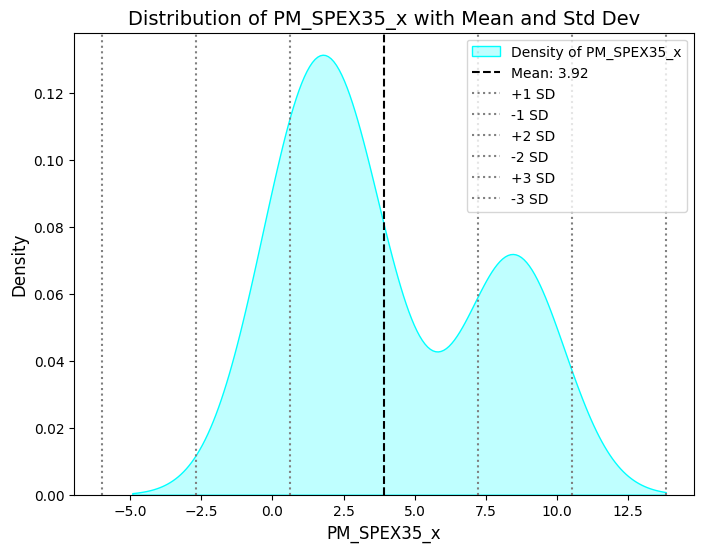

<ipython-input-49-8accb2870dfc>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature_name], color=color, shade=True, label=f'Density of {feature_name}')


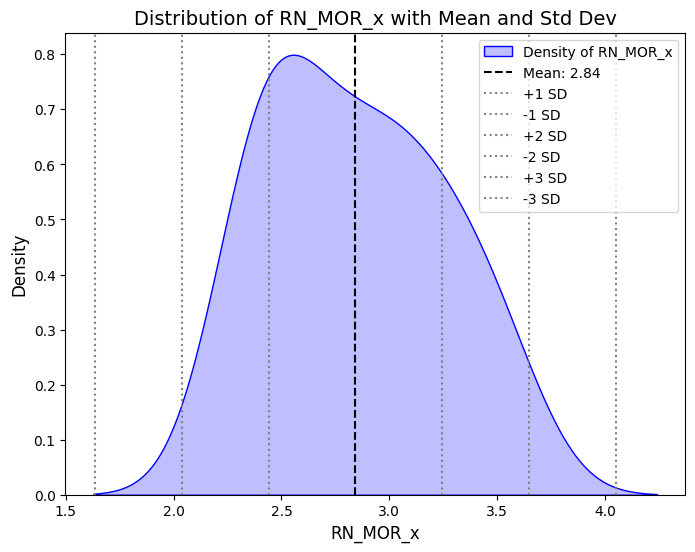

<ipython-input-49-8accb2870dfc>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature_name], color=color, shade=True, label=f'Density of {feature_name}')


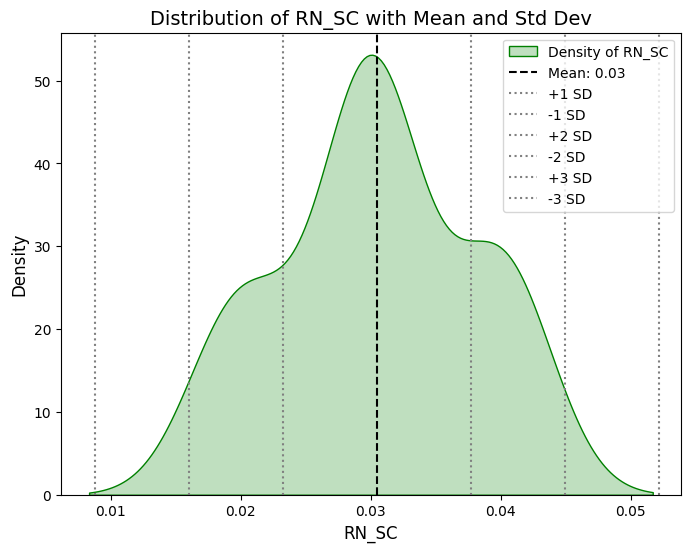

In [ ]:
def plot_density_with_components(data, feature_name, color):
    plt.figure(figsize=(8, 6))

    # Plot KDE (Density Curve)
    sns.kdeplot(data[feature_name], color=color, shade=True, label=f'Density of {feature_name}')

    # Hitung rata-rata dan standar deviasi
    mean_value = data[feature_name].mean()
    std_value = data[feature_name].std()

    # Tambahkan garis rata-rata (mean line)
    plt.axvline(mean_value, color='black', linestyle='--', label=f'Mean: {mean_value:.2f}')

    # Tambahkan garis untuk ±1, ±2, dan ±3 standar deviasi
    for i in range(1, 4):
        plt.axvline(mean_value + i * std_value, color='gray', linestyle=':', label=f'+{i} SD')
        plt.axvline(mean_value - i * std_value, color='gray', linestyle=':', label=f'-{i} SD')

    # Tambahkan label, judul, dan legend
    plt.title(f'Distribution of {feature_name} with Mean and Std Dev', fontsize=14)
    plt.xlabel(feature_name, fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.legend(loc='upper right', fontsize=10)

    # Tampilkan plot
    plt.show()


numeric_columns = df.select_dtypes(include=np.number).columns


colors = ['blue', 'green', 'red', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

# Iterasi melalui kolom numerik dan panggil fungsi plot
for i, column in enumerate(numeric_columns):
    plot_density_with_components(df, column, colors[i % len(colors)])

**Penjelasan kode :**  Kode ini bertujuan untuk memvisualisasikan distribusi setiap fitur numerik dalam sebuah DataFrame df menggunakan density plot (KDE - Kernel Density Estimation). Fungsi plot_density_with_components membuat grafik kepadatan untuk kolom yang ditentukan, menambahkan garis yang menunjukkan nilai rata-rata (mean) dan beberapa garis tambahan untuk rentang satu hingga tiga standar deviasi (±1 SD, ±2 SD, ±3 SD) dari rata-rata.

**Insight :** Visualisasi distribusi data melalui density plot ini memberikan wawasan tentang sebaran data dalam fitur numerik. Garis mean membantu mengidentifikasi pusat distribusi, sedangkan garis-garis standar deviasi menunjukkan seberapa jauh data tersebar dari rata-rata. Jika data mengikuti distribusi normal, sekitar 68% data akan berada dalam ±1 SD, 95% dalam ±2 SD, dan 99.7% dalam ±3 SD. Hal ini sangat membantu dalam mendeteksi outliers serta memahami pola distribusi dalam data.

### korelasi antar feature

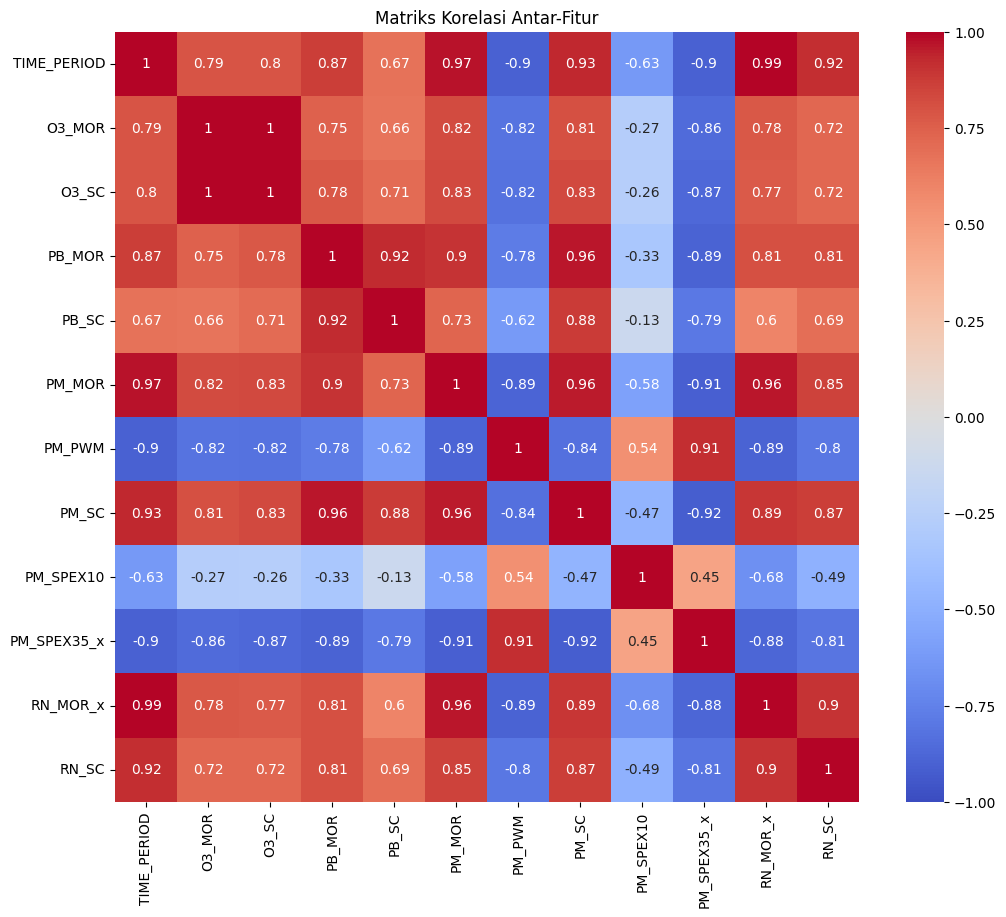


Pasangan fitur dengan korelasi tinggi (|r| > 0.7):
O3_MOR - TIME_PERIOD: 0.7930
O3_SC - TIME_PERIOD: 0.7950
O3_SC - O3_MOR: 0.9958
PB_MOR - TIME_PERIOD: 0.8679
PB_MOR - O3_MOR: 0.7457
PB_MOR - O3_SC: 0.7797
PB_SC - O3_SC: 0.7090
PB_SC - PB_MOR: 0.9243
PM_MOR - TIME_PERIOD: 0.9750
PM_MOR - O3_MOR: 0.8211
PM_MOR - O3_SC: 0.8295
PM_MOR - PB_MOR: 0.8991
PM_MOR - PB_SC: 0.7309
PM_PWM - TIME_PERIOD: -0.8992
PM_PWM - O3_MOR: -0.8160
PM_PWM - O3_SC: -0.8210
PM_PWM - PB_MOR: -0.7812
PM_PWM - PM_MOR: -0.8874
PM_SC - TIME_PERIOD: 0.9313
PM_SC - O3_MOR: 0.8064
PM_SC - O3_SC: 0.8286
PM_SC - PB_MOR: 0.9647
PM_SC - PB_SC: 0.8788
PM_SC - PM_MOR: 0.9603
PM_SC - PM_PWM: -0.8353
PM_SPEX35_x - TIME_PERIOD: -0.9020
PM_SPEX35_x - O3_MOR: -0.8551
PM_SPEX35_x - O3_SC: -0.8684
PM_SPEX35_x - PB_MOR: -0.8937
PM_SPEX35_x - PB_SC: -0.7895
PM_SPEX35_x - PM_MOR: -0.9127
PM_SPEX35_x - PM_PWM: 0.9143
PM_SPEX35_x - PM_SC: -0.9151
RN_MOR_x - TIME_PERIOD: 0.9931
RN_MOR_x - O3_MOR: 0.7769
RN_MOR_x - O3_SC: 0.7716
RN_MOR_

<Figure size 1200x1000 with 0 Axes>

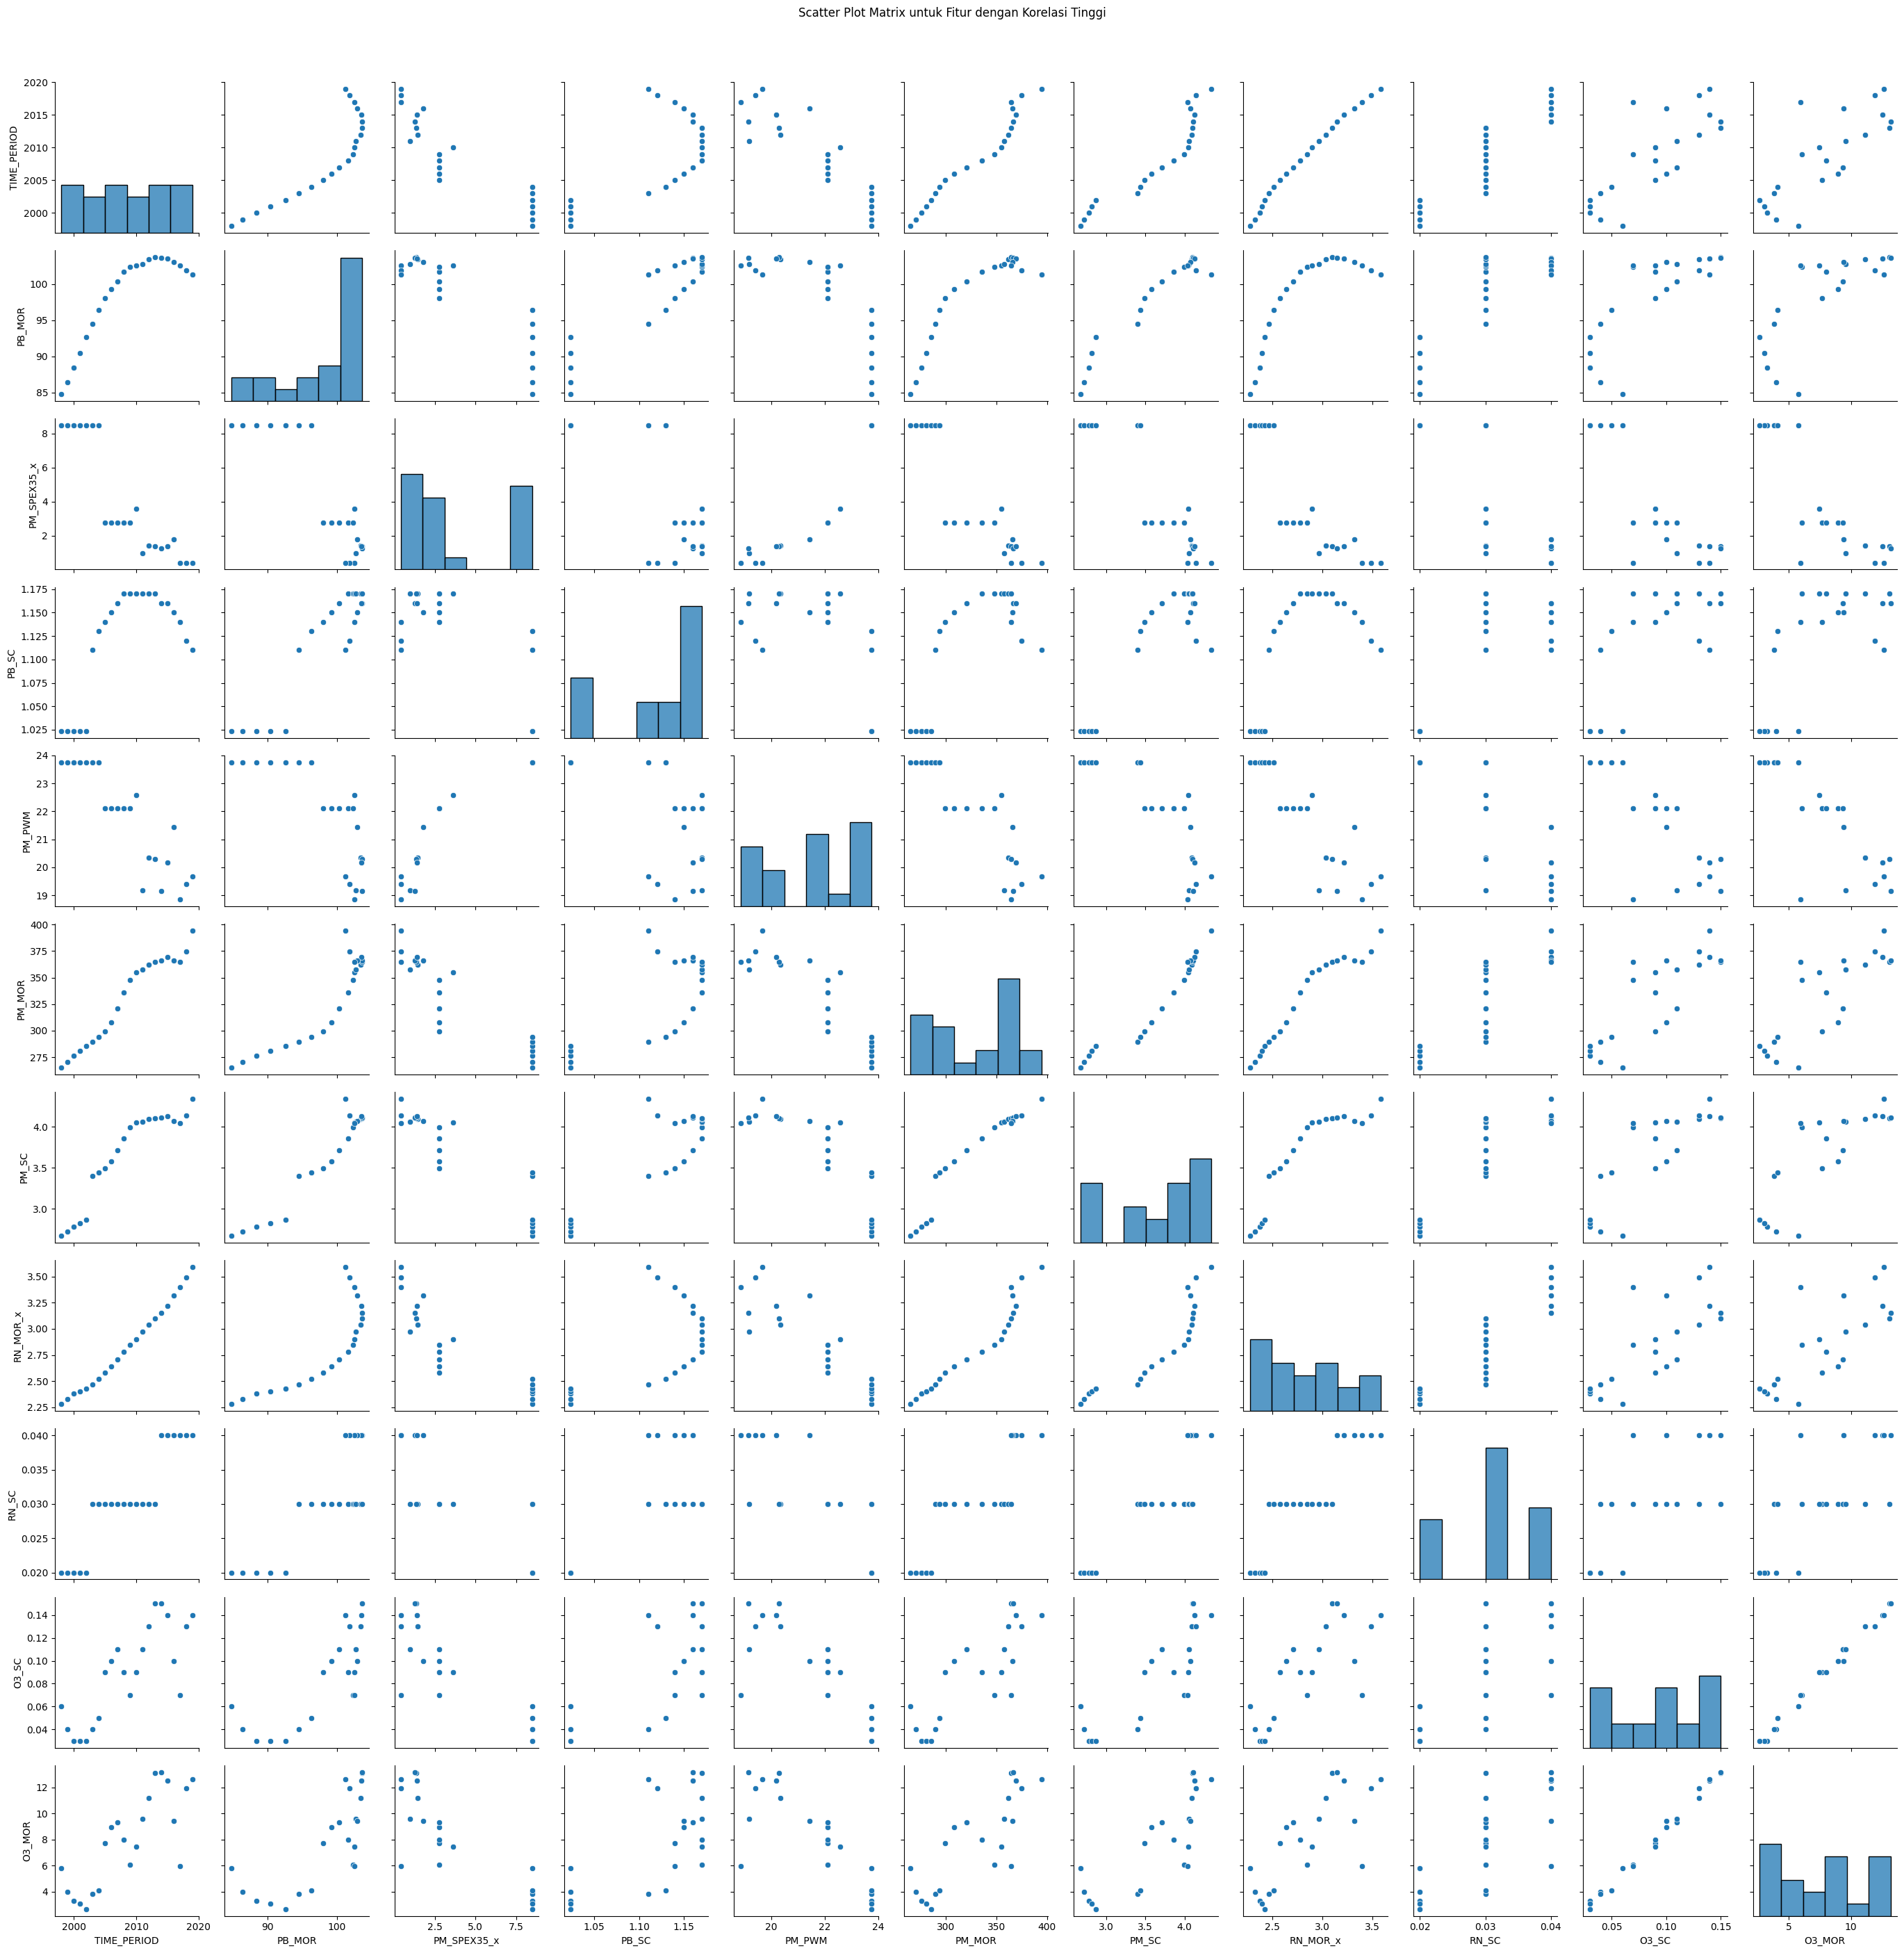

In [ ]:
def analyze_correlation(df):
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    corr_matrix = df[numeric_columns].corr()

    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
    plt.title("Matriks Korelasi Antar-Fitur")
    plt.show()

    print("\nPasangan fitur dengan korelasi tinggi (|r| > 0.7):")
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > 0.7:
                print(f"{corr_matrix.columns[i]} - {corr_matrix.columns[j]}: {corr_matrix.iloc[i, j]:.4f}")

    # Scatter plot matrix untuk fitur-fitur dengan korelasi tinggi
    high_corr_features = set()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > 0.7:
                high_corr_features.add(corr_matrix.columns[i])
                high_corr_features.add(corr_matrix.columns[j])

    if high_corr_features:
        plt.figure(figsize=(12, 10))
        sns.pairplot(df[list(high_corr_features)])
        plt.suptitle("Scatter Plot Matrix untuk Fitur dengan Korelasi Tinggi", y=1.02)
        plt.tight_layout()
        plt.show()

# Jalankan fungsi
analyze_correlation(df)

**Penjelasan kode :** Kode ini berfungsi untuk menganalisis korelasi antar-fitur numerik dalam DataFrame df. Fungsi analyze_correlation menghitung matriks korelasi untuk kolom numerik, memvisualisasikan hasilnya dengan heatmap, dan mengidentifikasi pasangan fitur yang memiliki korelasi tinggi (nilai absolut korelasi lebih besar dari 0.7). Selain itu, scatter plot matrix juga dihasilkan untuk memperlihatkan hubungan visual antar-fitur yang memiliki korelasi tinggi.

**Insight :** Matriks korelasi adalah alat yang efektif untuk memahami hubungan antar-fitur dalam dataset. Korelasi tinggi (baik positif maupun negatif) bisa menunjukkan adanya hubungan linier yang kuat antara fitur, yang berguna dalam analisis data atau saat membangun model machine learning. Korelasi yang sangat tinggi dapat mengindikasikan masalah multicollinearity, di mana beberapa fitur memberikan informasi yang serupa, sehingga bisa dipertimbangkan untuk direduksi atau diproses lebih lanjut. Scatter plot matrix juga memperlihatkan hubungan visual antar-fitur, memperkuat analisis korelasi yang telah dilakukan.

## **C.3**

### **Feature Engineering**

##### Menghitung dan mengkategorikan Indeks Kualitas Udara (AQI)

In [ ]:
# Fungsi untuk menghitung AQI
def hitung_aqi(o3, pm10, pm25):
    # Formula AQI dapat disesuaikan dengan standar yang berlaku
    aqi = o3 + pm10 + pm25
    return aqi

# Membuat fitur baru AQI
df['AQI'] = df.apply(lambda x: hitung_aqi(x['O3_SC'], x['PM_SC'], x['PM_SPEX10']), axis=1)

# Kategorisasi kualitas udara berdasarkan AQI
def kategori_kualitas_udara(aqi):
    if 0 <= aqi <= 50:
      return 'Good'
    elif 51 <= aqi <= 100:
      return 'Moderate'
    elif 101 <= aqi <= 150:
      return 'Unhealthy for Sensitive Groups'
    elif 151 <= aqi <= 200:
      return 'Unhealty'
    elif 201 <= aqi <= 300:
      return 'Very Unhealthy'
    else:
      return 'Hazardous'

df['Kategori_Kualitas'] = df['AQI'].apply(kategori_kualitas_udara)
df

,Reference area,TIME_PERIOD,O3_MOR,O3_SC,PB_MOR,PB_SC,PM_MOR,PM_PWM,PM_SC,PM_SPEX10,PM_SPEX35_x,RN_MOR_x,RN_SC,AQI,Kategori_Kualitas
0,Indonesia,1998,5.79,0.06,84.73,1.02375,265.25,23.76,2.67,99.41000,8.48,2.28,0.02,102.14000,Unhealthy for Sensitive Groups
1,Indonesia,1999,4.00,0.04,86.36,1.02375,270.82,23.76,2.72,99.41000,8.48,2.33,0.02,102.17000,Unhealthy for Sensitive Groups
2,Indonesia,2000,3.29,0.03,88.40,1.02375,276.17,23.76,2.78,99.41000,8.48,2.38,0.02,102.22000,Unhealthy for Sensitive Groups
3,Indonesia,2001,3.07,0.03,90.44,1.02375,280.73,23.76,2.82,99.41000,8.48,2.40,0.02,102.26000,Unhealthy for Sensitive Groups
4,Indonesia,2002,2.65,0.03,92.61,1.02375,285.38,23.76,2.87,99.41000,8.48,2.43,0.02,102.31000,Unhealthy for Sensitive Groups
5,Indonesia,2003,3.80,0.04,94.50,1.11000,289.53,23.76,3.40,99.41000,8.48,2.47,0.03,102.85000,Unhealthy for Sensitive Groups
6,Indonesia,2004,4.11,0.05,96.35,1.13000,294.17,23.76,3.44,99.41000,8.48,2.52,0.03,102.90000,Unhealthy for Sensitive Groups
7,Indonesia,2005,7.70,0.09,98.02,1.14000,299.49,22.11,3.49,99.54000,2.77,2.58,0.03,103.12000,Unhealthy for Sensitive Groups
8,Indonesia,2006,8.95,0.10,99.27,1.15000,308.05,22.11,3.58,99.54000,2.77,2.64,0.03,103.22000,Unhealthy for Sensitive Groups
9,Indonesia,2007,9.34,0.11,100.31,1.16000,320.89,22.11,3.71,99.54000,2.77,2.71,0.03,103.36000,Unhealthy for Sensitive Groups


**Penjelasan kode dan insight:**

Kode di atas berfungsi untuk menghitung Indeks Kualitas Udara (AQI) berdasarkan konsentrasi tiga polutan yaitu Ozone (O3), Particulate Matter 10 (PM10), dan Particulate Matter 2.5 (PM2.5). Fungsi `hitung_aqi` menjumlahkan nilai ketiga polutan untuk menghasilkan AQI. Kemudian, kolom baru `AQI` ditambahkan ke DataFrame df dengan menggunakan metode `apply()`. Selanjutnya, fungsi `kategori_kualitas_udara` mengkategorikan `AQI` ke dalam beberapa kategori yaitu 'Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy', dan 'Hazardous'. Kolom `kategori_kualitas_udara`  juga ditambahkan ke DataFrame untuk menyimpan hasil kategorisasi ini.

Dengan menghitung dan mengkategorikan AQI, maka dapat memahami distribusi kualitas udara di suatu wilayah serta mengidentifikasi waktu dan lokasi berbahaya, terutama untuk kelompok sensitif. Informasi ini berguna untuk pengambilan keputusan dalam kebijakan lingkungan dan kesehatan masyarakat, serta mendukung upaya mitigasi polusi. Dan untuk hasil perhitungan AQI pada data ini menunjukkan bahwa kualitas udara pada negara indonesia dikategorikan tidak sehat untuk kelompok sensitif karna nilai AQI yang diperoleh sekitar 102 dan 103. Mungkin jika data yang diambil berupa beberapa negara, maka hasil kategori kualitas udara akan berbeda-beda.

##### Perubahan Konsentrasi PM10

In [ ]:
# Membuat fitur baru perubahan konsentrasi PM10
df['Perubahan_PM10'] = df['PM_SC'] - df['PM_MOR']
df.head(10)

,Reference area,TIME_PERIOD,O3_MOR,O3_SC,PB_MOR,PB_SC,PM_MOR,PM_PWM,PM_SC,PM_SPEX10,PM_SPEX35_x,RN_MOR_x,RN_SC,AQI,Kategori_Kualitas,Perubahan_PM10
0,Indonesia,1998,5.79,0.06,84.73,1.02375,265.25,23.76,2.67,99.41,8.48,2.28,0.02,102.14,Unhealthy for Sensitive Groups,-262.58
1,Indonesia,1999,4.00,0.04,86.36,1.02375,270.82,23.76,2.72,99.41,8.48,2.33,0.02,102.17,Unhealthy for Sensitive Groups,-268.10
2,Indonesia,2000,3.29,0.03,88.40,1.02375,276.17,23.76,2.78,99.41,8.48,2.38,0.02,102.22,Unhealthy for Sensitive Groups,-273.39
3,Indonesia,2001,3.07,0.03,90.44,1.02375,280.73,23.76,2.82,99.41,8.48,2.40,0.02,102.26,Unhealthy for Sensitive Groups,-277.91
4,Indonesia,2002,2.65,0.03,92.61,1.02375,285.38,23.76,2.87,99.41,8.48,2.43,0.02,102.31,Unhealthy for Sensitive Groups,-282.51
5,Indonesia,2003,3.80,0.04,94.50,1.11000,289.53,23.76,3.40,99.41,8.48,2.47,0.03,102.85,Unhealthy for Sensitive Groups,-286.13
6,Indonesia,2004,4.11,0.05,96.35,1.13000,294.17,23.76,3.44,99.41,8.48,2.52,0.03,102.90,Unhealthy for Sensitive Groups,-290.73
7,Indonesia,2005,7.70,0.09,98.02,1.14000,299.49,22.11,3.49,99.54,2.77,2.58,0.03,103.12,Unhealthy for Sensitive Groups,-296.00
8,Indonesia,2006,8.95,0.10,99.27,1.15000,308.05,22.11,3.58,99.54,2.77,2.64,0.03,103.22,Unhealthy for Sensitive Groups,-304.47
9,Indonesia,2007,9.34,0.11,100.31,1.16000,320.89,22.11,3.71,99.54,2.77,2.71,0.03,103.36,Unhealthy for Sensitive Groups,-317.18


**Penjelasan kode dan insight:**

Kode diatas membuat kolom baru bernama `Perubahan_PM10` yang merupakan selisih antara dua kolom `PM_MOR` (Partikel udara yang diukur di pagi hari) dan `PM_SC` (Konsentrasi partikel udara pada skala atau waktu lain).

Hasil yang diperoleh berupa gambaran tentang bagaimana konsentrasi PM10 berubah antara dua kondisi atau waktu yang berbeda.

* Nilai positif pada kolom `Perubahan_PM10` menunjukkan bahwa konsentrasi PM10 pada waktu atau kondisi `PM_SC` lebih tinggi daripada `PM_MOR`.
* Nilai negatif menunjukkan bahwa konsentrasi PM10 menurun dalam waktu atau kondisi tersebut.
* Nilai nol menunjukkan tidak ada perubahan konsentrasi antara dua kondisi atau waktu tersebut.


Hasil ini dapat memberikan wawasan tentang fluktuasi atau variasi polusi udara (PM10) berdasarkan waktu atau kondisi tertentu, yang bisa penting dalam menganalisis kualitas udara atau dampak dari aktivitas tertentu pada konsentrasi polutan.

##### Total Kematian

In [ ]:
# Fungsi untuk menghitung Total Kematian
def total_kematian(o3_mor, pb_mor, pm_mor, rn_mor):
    # Formula AQI dapat disesuaikan dengan standar yang berlaku
    total = o3_mor + pb_mor + pm_mor + rn_mor
    return total

df['Total_Kematian'] = df.apply(lambda x: total_kematian(x['O3_MOR'], x['PB_MOR'], x['PM_MOR'], x['RN_MOR_x']), axis=1)
df

,Reference area,TIME_PERIOD,O3_MOR,O3_SC,PB_MOR,PB_SC,PM_MOR,PM_PWM,PM_SC,PM_SPEX10,PM_SPEX35_x,RN_MOR_x,RN_SC,AQI,Kategori_Kualitas,Perubahan_PM10,Total_Kematian
0,Indonesia,1998,5.79,0.06,84.73,1.02375,265.25,23.76,2.67,99.41000,8.48,2.28,0.02,102.14000,Unhealthy for Sensitive Groups,-262.58,358.05
1,Indonesia,1999,4.00,0.04,86.36,1.02375,270.82,23.76,2.72,99.41000,8.48,2.33,0.02,102.17000,Unhealthy for Sensitive Groups,-268.10,363.51
2,Indonesia,2000,3.29,0.03,88.40,1.02375,276.17,23.76,2.78,99.41000,8.48,2.38,0.02,102.22000,Unhealthy for Sensitive Groups,-273.39,370.24
3,Indonesia,2001,3.07,0.03,90.44,1.02375,280.73,23.76,2.82,99.41000,8.48,2.40,0.02,102.26000,Unhealthy for Sensitive Groups,-277.91,376.64
4,Indonesia,2002,2.65,0.03,92.61,1.02375,285.38,23.76,2.87,99.41000,8.48,2.43,0.02,102.31000,Unhealthy for Sensitive Groups,-282.51,383.07
5,Indonesia,2003,3.80,0.04,94.50,1.11000,289.53,23.76,3.40,99.41000,8.48,2.47,0.03,102.85000,Unhealthy for Sensitive Groups,-286.13,390.30
6,Indonesia,2004,4.11,0.05,96.35,1.13000,294.17,23.76,3.44,99.41000,8.48,2.52,0.03,102.90000,Unhealthy for Sensitive Groups,-290.73,397.15
7,Indonesia,2005,7.70,0.09,98.02,1.14000,299.49,22.11,3.49,99.54000,2.77,2.58,0.03,103.12000,Unhealthy for Sensitive Groups,-296.00,407.79
8,Indonesia,2006,8.95,0.10,99.27,1.15000,308.05,22.11,3.58,99.54000,2.77,2.64,0.03,103.22000,Unhealthy for Sensitive Groups,-304.47,418.91
9,Indonesia,2007,9.34,0.11,100.31,1.16000,320.89,22.11,3.71,99.54000,2.77,2.71,0.03,103.36000,Unhealthy for Sensitive Groups,-317.18,433.25


**Penjelasan kode dan insight:**

Kode di atas mendefinisikan fungsi `Total_Kematian` yang menghitung total kematian akibat beberapa polutan udara, yaitu Ozone (O₃), Timbal (Pb), Partikulat (PM), dan Radon (Rn). Fungsi ini menjumlahkan nilai dari masing-masing polutan untuk menghasilkan total kematian dari semua sumber tersebut. Selanjutnya, kode menggunakan metode apply pada DataFrame df untuk menerapkan fungsi ini pada setiap baris, mengambil nilai dari kolom yang relevan dan menyimpan hasil perhitungan di kolom baru bernama `Total_Kematian`.

Setelah fungsi ini dijalankan, DataFrame akan memiliki kolom baru yang berisi hasil total kematian untuk setiap baris. Penjumlahan ini dapat digunakan untuk analisis dampak total polusi udara terhadap kematian di lokasi atau waktu tertentu. Polutan seperti Ozone, Timbal, dan partikulat diketahui memiliki dampak signifikan terhadap kesehatan manusia, sehingga hasil ini bisa memberikan insight terkait potensi risiko kesehatan.

##### Standarisasi Data

In [ ]:
# Normalisasi fitur numerik menggunakan StandardScaler
scaler = StandardScaler() # menyiapkan alat untuk melakukan standarisasi tapi belum melakukan apa2 terhadap data

# Kolom yang akan dinormalisasi
# pastikan semua kolom berada pada dataframe
columns_to_scale = ['O3_MOR','O3_SC','PB_MOR','PB_SC','PM_MOR','PM_PWM','PM_SC','PM_SPEX10','PM_SPEX35_x','RN_MOR_x','RN_SC', 'AQI','Perubahan_PM10','Total_Kematian']
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale]) # Menggunakan MIN-Max Scaling

print("\nData setelah normalisasi:\n", df)


Data setelah normalisasi:
    Reference area  TIME_PERIOD    O3_MOR     O3_SC    PB_MOR     PB_SC  \
0       Indonesia         1998 -0.607597 -0.713289 -2.282662 -1.742203   
1       Indonesia         1999 -1.124382 -1.211459 -2.009206 -1.742203   
2       Indonesia         2000 -1.329364 -1.460544 -1.666967 -1.742203   
3       Indonesia         2001 -1.392880 -1.460544 -1.324728 -1.742203   
4       Indonesia         2002 -1.514137 -1.460544 -0.960679 -1.742203   
5       Indonesia         2003 -1.182124 -1.211459 -0.643605 -0.201921   
6       Indonesia         2004 -1.092625 -0.962374 -0.333241  0.155246   
7       Indonesia         2005 -0.056167  0.033966 -0.053075  0.333829   
8       Indonesia         2006  0.304717  0.283051  0.156631  0.512413   
9       Indonesia         2007  0.417313  0.532136  0.331106  0.690996   
10      Indonesia         2008  0.030445  0.033966  0.555910  0.869579   
11      Indonesia         2009 -0.526759 -0.464204  0.671667  0.869579   
12      In

**Penjelasan kode dan insight:**

Kode Python di atas menggunakan `StandardScaler` dari `sklearn.preprocessing` untuk melakukan normalisasi pada fitur numerik dalam DataFrame df. Pertama, kode ini mendefinisikan kolom-kolom yang akan dinormalisasi dalam variabel `columns_to_scale`. Kemudian, metode `fit_transform `digunakan untuk menghitung rata-rata dan deviasi standar dari kolom-kolom tersebut, lalu mengubah nilainya menjadi distribusi dengan rata-rata 0 dan deviasi standar 1. Hasil normalisasi ini disimpan kembali ke dalam DataFrame. Normalisasi data membantu menciptakan skala yang seragam, mengurangi dampak nilai ekstrem, dan mempermudah interpretasi hasil analisis. Selain itu, langkah ini sangat penting dalam persiapan data untuk algoritma pembelajaran mesin yang sensitif terhadap skala fitur, sehingga dapat meningkatkan kinerja model secara keseluruhan.